In [6]:
import numpy as np
from libow8 import sensor_net
import matplotlib.pyplot as plt
import owutils as ut
from design_handle import designs
from pyswarms.single.global_best import GlobalBestPSO


In this scenario a room of 10x10x3 m is considered.

ZigBee nodes equiped with solar panels gather data from 3 sensors (each) and transfer them to the central node (star topology).

1 window (2x2m)

25 LEDs on the ceiling (6W each) ~ 550 lumens avg

sensors: 
GAS SENSORS MQ-2 Voltage: (5V) Power Consumption: (0.8W)  I = (0.16 A) data = 3 bytes


DHT11: Voltage: (5V) Current: (0.2mA) data = 2 bytes

TSL2561 light sensor (broadband & IR): Voltage: (5V), Current: (0.5mA), data = 2 bytes

data = 7 bytes

6 Bytes PHY Header + 5 bytes MAC Header + 7 PAYLOAD + 2 MAC FOOTER (FCS) = 20 BYTES -> 40 SYMBOLS -> 2 TIMESLOTS



In [7]:
KEY = 'e_solar'
params_d = designs[KEY] 

In [8]:
h_ww = None
r_sens = None
n_particles = 20
def sensor_ar(x,params_d = None): 
    global h_ww
    global r_sens
    global n_particles
    r_sensor = np.tile(r_sens,(n_particles,1)) 
    nR =ut.spher_to_cart_ar(1, x[:,0], x[:,1]).T
    params_d['r_sensor'] = r_sensor
    params_d['nR_sensor'] = nR
    #params_d['nS_sensor'] = nR
    l = sensor_net( **params_d ) 
    l.calch(h_ww = h_ww)
    l.light_sim()
    h_ww = l.h_ww
    fitness = np.sum(np.sum(l.Pin_sm_diff,axis = 0),axis = 1) + np.sum(l.Pin_sm,axis = 0) + l.Pin_sa #LOS + Diffuse + Ambient
    return fitness 

In [9]:
def fit_function(x):
    f = sensor_ar(x,params_d=params_d)
    g = 1/f
    g = np.array(g)
    g = g.reshape(x.shape[0])
    print(g)
    return g

In [10]:
r_sen = designs[KEY]['r_sensor'] 
N = r_sen.shape[0]
pos_l = [0]*N #SN Position
pow_l = [0]*N #SN Optical Power
op_l = [0]*N #SN Orientation
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
lb = np.array([0, 0])
ub = np.array([np.pi/2,2*np.pi])
for i in range(0,N):
    r_sens = r_sen[i]
    optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=2, options=options, bounds=(lb, ub))
    best_cost, best_pos = optimizer.optimize(fit_function, iters=20) 
    pos_l[i] = r_sens
    pow_l[i] = 1/best_cost
    op_l[i] = best_pos


2024-12-23 18:01:15,742 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=47.3

[  75.44001774  226.29702607  653.14088408  443.55605726 1208.04084174
 1425.56880794 1783.5613573   122.15832705 1800.10739243  139.60717298
  216.69321236  325.57629428 1779.77809742   96.79228297   93.26727914
 1939.05881771   47.32448684   49.46083193  194.9018828   300.74457762]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=47.3

[ 105.95262295  976.51630349 1153.95703253  847.8709746   140.23296867
 1353.79266243  112.39132655   47.992979    199.13619245  171.41380264
  161.13273054  208.70199539  638.27333977  129.31433216  118.49225979
  605.67534034  101.50103954   48.7362743   553.92113509  135.16436587]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=47.3

[ 178.80535036 1975.44935733 1277.1428805   978.73174557  101.42422809
 1613.16896913   62.80722698   61.3200409   720.87070789   94.2784233
  121.7390857   126.16790915 1317.90926097  300.74675073  166.64777497
 1136.20440052   50.2420045    76.19392788  770.68324166  458.33250832]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=47.3

[  90.03570535 1863.52049003   83.54546012   65.19773225   66.6234816
 1753.96988264   47.27799239  124.39402278 1224.00207887   51.48525106
   94.10273049   96.49735618  145.09649841  104.27089204  124.48030212
 1838.40480804   96.68324889   62.29779438 1272.52598982 1169.76880244]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=46.9

[  59.4684992   261.19135938   47.75217353   47.09587724   53.56962582
 1823.88454404   88.86781261   64.24632297  234.40353726   46.88033044
   47.36611373   62.99650618  156.30262234   59.94989329   95.22600326
  140.85661116   47.47301058   89.02651653 1794.47950966 1524.99593131]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=46.9

[ 47.56434714 145.77792559  48.97420364  56.34590127  77.04144181
 566.93230047  56.39946129  51.08068877 421.57100684  66.48331631
 104.5398345   49.08931022  73.71215466  48.81530154  57.64737591
 152.32931939  50.59408726  49.01496768 135.07741371 113.00993191]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=46.1

[ 48.75098822  80.95527978  53.61782961  78.35641078  50.41499206
  66.30335634  78.08509175  66.60446851 314.16382037 128.6888957
  51.88408238  46.05587777  48.25129258  84.30338104  46.41339666
 110.65111228 115.68810304  73.75634185 112.94195222  66.00054397]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=46.1

[  51.75589951   65.92205558   52.13534742   62.26626445   52.77743413
   46.77618647   46.58298188   64.67880049 2029.34568233   74.15181215
   60.25800722   48.06521224   48.09563369   48.1626306    48.62413254
   62.89252737   47.38375169   50.38785728   62.26608509   85.15655848]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=46.1

[ 50.36468995  69.39673311  48.48754998  46.56225525 126.81855602
  49.9548472   57.8458517   82.98148256 691.976981    52.76131579
 133.42388604  50.81742062 132.89722794  66.5114893   50.22635305
  46.8657345   64.85952041  48.93652597  82.50216957 108.41142048]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=46.1

[  47.2479251    59.42254699   46.2922159    48.34177953   62.68306633
   62.85256      55.0321979   125.8481001  1508.3179533    99.37242548
   48.57861001   50.37762598   80.45252544   56.21642841   47.33646062
   51.11383315   46.11527333   70.49198427  176.81231693  100.86480018]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=46.1

[ 47.23527466  52.95728677  49.93769445  52.24250598  48.52877163
  50.7726372   58.41777164 106.41437002 161.28017589  46.59994035
  53.90282719  48.74925369  64.02124352  55.9524005   46.34059698
  67.00904389  82.46613839  46.55240863 136.29886874  79.22292269]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=46.1

[ 48.90490789  51.4647261   54.84833904  49.23632744 115.68154362
  46.37568081  48.3102712   65.73362238 247.68602513  68.56161552
  95.12099686  46.19647717 129.58630013 129.34371034  48.1765064
  56.27097504  46.77453387  64.91891652  83.4811933   60.49904978]


pyswarms.single.global_best:  65%|████████████████▉         |13/20, best_cost=46

[ 50.09264441  52.18644442  53.0920481   46.13249858  48.57909147
  46.91407245  60.2555959   50.54039346 125.48405005  51.22689325
  48.64387134  46.48489953  47.24140852  46.02614924  49.32411932
  47.42150802  59.60025091  47.20297259  69.63039001  50.18028728]


pyswarms.single.global_best:  70%|██████████████████▏       |14/20, best_cost=46

[ 48.45501733  50.70674417  47.47793504  46.7146542  109.55279705
  48.00304625  48.68835626  69.24488942  47.7665315   78.40938885
  75.45465689  47.65804078  51.41804953  59.73680643  48.11151804
  46.55032154  49.3220383   56.52002572  73.57358866  48.31754972]


pyswarms.single.global_best:  75%|███████████████████▌      |15/20, best_cost=46

[ 46.57836651  49.35649919  46.04295778  47.60120273  46.50054226
  48.91685082  59.83279693  48.55189029  56.05133067  46.54083199
  46.24043255  47.54870798 118.22741966 131.46078044  46.64103193
  50.31132767  56.51686926  49.17114103  85.77474762  50.94748305]


pyswarms.single.global_best:  80%|████████████████████▊     |16/20, best_cost=46

[ 46.21609208  48.248739    46.9199556   47.26208656  71.87083084
  46.64802867 129.2506512   78.35848265  77.77290442 103.12503689
  90.93359924  46.72465887 116.12282753 112.46259771  46.08043577
  55.37448337  46.69800057  54.55517031  84.08143062  51.86431421]


pyswarms.single.global_best:  85%|██████████████████████    |17/20, best_cost=46

[ 46.71662556  47.54073432  47.5947113   46.49124102  48.72006398
  46.40993633  46.27127261  46.15231822  78.86731286  54.34636511
  47.59793487  46.11389874  71.25075891  92.33276112  46.40468151
  50.82601936  73.12517181 129.50497184  70.05710209  49.95661313]


pyswarms.single.global_best:  90%|███████████████████████▍  |18/20, best_cost=46

[47.04827899 47.3302085  47.9245093  46.10328272 50.79130001 48.28920253
 66.28928145 80.84033125 53.84090476 46.611708   95.60551391 46.18380692
 52.20501234 93.36789729 46.79686388 46.7958136  47.03357039 47.50123648
 54.10124559 47.65453461]


pyswarms.single.global_best:  95%|████████████████████████▋ |19/20, best_cost=46

[ 47.16218267  47.26645796  46.93720521  46.08072586  48.76292202
  49.2889079   49.15961882  48.70302324  46.19807079 112.36602173
  46.62500974  46.48291943  47.03064498  74.50529375  47.05118583
  46.42149425  58.42933528  65.494928    47.65873178  46.41530946]


pyswarms.single.global_best: 100%|██████████████████████████|20/20, best_cost=46
2024-12-23 18:01:47,805 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 46.02614924146983, best pos: [1.16178139 1.65904941]
2024-12-23 18:01:47,812 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 46.26865113  47.01565631  46.16665875  46.43374078  63.55368014
  49.24184357  55.57893295  79.23123174  51.89916525  50.19482027
  71.80643042  46.39050451  48.45601454  59.56088312  46.77299583
  48.17336103  46.1895299  109.33270386  47.31969506  46.0541035 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=19.5

[  43.9449042    22.94130673  411.90922192   19.45753234  894.1341748
   71.71193985  100.85307123   33.93543997 1103.03245696  118.08423422
   54.18661628   20.21086475   76.01024638   26.6132869    69.56088818
   82.57323694   57.82530172   42.61222424   48.25054999  130.33455445]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=19.5

[ 61.18157352  25.5761583  867.86372241  35.49137431 182.85321446
 752.66411913 713.27131201  24.26539706 123.16800145 764.25340652
  25.28557213  24.65809545 351.39810418  48.79176669  41.6449294
 933.03624397  51.43804775  46.96914263  21.68345343  59.31146221]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=19.1

[  48.81821609   25.09149457  103.21088328   19.09880677  462.23529276
  252.66037812  198.5235121    25.71172039  191.66758153 1347.92475389
   19.20157028   19.49010405  140.06366533   27.69657379   53.5766062
   73.6338362    33.31225661   42.95947109   25.37183431  397.54229445]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=19.1

[  36.48284406   24.23908164  447.72631482   42.18580567   31.25081625
   23.28539137   34.32157202   51.9052168    60.00387728 1087.99098237
   19.67984882   23.86822643   28.80199997   20.15786401   23.09073171
   39.11833022   21.04798952   33.60770996   31.41963131 1350.48516791]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=18.9

[  24.09879541   20.93230067  612.9843185    19.0112622    18.91961716
   20.12929489   20.37392509   25.99498187   52.93354008  441.69155618
   41.76812695   20.21375932   19.24925801   19.76851457   33.0129713
   40.85539975   19.21480761   23.31270507   21.97456868 1819.80600728]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=18.9

[  19.50023291   19.3842417   590.39051537   26.10626017   25.11359451
   24.79614087   19.22062661   21.5173686    26.95463608   43.22200271
   22.180165     21.54401785   20.09692665   36.90452259   19.26858748
   19.69684302   55.07143142   19.74317638   56.24865373 1268.30729696]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=18.9

[ 19.20387986  18.97522894 280.14690256  19.70548071  30.7268936
  27.22635128  21.73093358  39.65064696  19.37513705  23.28064727
  19.09195435  19.98887889  22.0706736   19.59039861  26.92392377
  20.31069464  23.99564963  19.57555009  24.35332421  53.90481319]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=18.9

[ 21.21794201  19.10458783 127.87760436  21.77443021  24.89420033
  24.46544456  22.63859158  19.81856786  19.71976514  22.11888052
  52.16665524  24.34312841  22.11966115  19.86649759  18.9845349
  32.36449327  20.76108386  20.38547625  19.25393257  35.52740448]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=18.9

[ 22.50635675  19.25224788 225.91647022  19.32097597  19.33051496
  20.22355301  21.93440015  21.9443875   57.47649671  26.46471798
  19.31353967  19.28571701  19.12238381  30.60478919  27.53825307
  21.23598374  29.9250602   20.5862344   36.78279688  31.29775197]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=18.9

[ 20.92736259  19.28746668 190.06722937  31.0872461   19.31993906
  18.94636487  19.8475333   42.6276429   26.33664647  25.51950101
  30.54483137  19.16072648  19.20567022  19.32167245  18.96009826
  18.95554827  19.93927874  19.48549785  18.99097158  28.37566461]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=18.9

[ 19.09143625  19.0854959  154.80394803  18.975661    21.67545287
  19.51915509  18.99523476  18.92427979  19.41926939  21.30988775
  19.97398869  47.68092396  19.78641476  19.83379323  32.06418893
  19.5988836   21.8102034   18.93509724  31.50313998  24.07592081]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=18.9

[19.13786632 18.90906831 89.23352763 37.27902754 23.99736162 19.95983981
 19.02840724 23.63780606 19.45559662 19.23717289 20.46017706 24.44228513
 19.30998932 38.12948964 18.97592294 20.03097315 21.66945499 19.12051185
 18.92841863 22.28650829]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=18.9

[19.45415091 19.02094229 42.6385472  19.97116635 22.85483864 19.60584443
 19.16670004 20.09532625 55.21053897 19.17671171 57.8226112  19.34429805
 18.92463526 22.36386743 29.15350461 19.17626536 25.97483239 19.19337872
 26.59903674 21.73000515]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=18.9

[19.14002416 19.15205919 24.25016631 19.90888367 19.26858259 19.07400364
 19.05295208 22.40374846 21.47687558 20.21803551 19.30501745 23.73612442
 19.36480809 18.94471089 19.20573703 19.01150541 19.44055702 19.14052229
 19.869489   21.58702375]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=18.9

[18.9632612  19.09447044 23.91524639 27.47517206 19.32788748 19.0281941
 18.92887816 19.91553949 19.96759458 20.95373301 25.18329964 18.90706852
 19.8440925  20.02102699 53.06964459 19.21590707 23.97181401 19.04543796
 22.82185562 20.69877124]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=18.9

[19.30701628 18.96191896 37.23906392 18.96624563 20.33706883 19.41801775
 19.14395916 25.0211441  31.84764135 19.96504342 19.46192642 43.10056606
 19.64480274 32.88684836 18.98971984 19.39255006 20.73507506 18.95145441
 19.80902884 19.58240149]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=18.9

[19.7519919  18.918388   89.90398809 44.46481335 20.87042783 19.48846869
 19.14603684 18.99210276 20.53718638 19.31853656 26.06697978 21.28224495
 19.03735487 19.05868336 21.56694655 19.36623135 22.57766112 19.03022055
 23.85400461 19.04865501]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=18.9

[19.85393495 19.01786589 40.29624848 20.13574102 19.68227984 19.27528238
 19.04775402 30.02171962 19.21099393 18.95164819 18.90581682 19.47888382
 18.97386235 38.41816147 20.06285196 19.11563544 20.41157878 19.10595377
 18.92580272 18.91300056]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=18.9

[19.131971   19.04347568 21.25616477 56.14654356 19.0656037  19.05425752
 18.93207129 18.90304428 36.7830694  18.96121923 34.12818305 31.62878515
 19.16492133 18.90515572 24.183642   18.95255098 23.1797455  19.01521288
 35.10923214 19.11422192]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=18.9
2024-12-23 18:02:18,485 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18.90304428072292, best pos: [1.18140102 1.80568551]
2024-12-23 18:02:18,493 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[18.94256397 19.03942492 19.44854772 19.17823934 19.03444649 18.93856822
 18.90704344 31.09621094 19.2580339  19.07646914 19.05673984 19.76052585
 19.07530413 26.3008165  19.04488174 18.92954949 19.34649903 18.9312283
 18.94561751 19.1579558 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=11.2

[  33.38419577  348.27329944   11.72983337 1004.299398     34.99908054
   15.74489845   95.47043065  746.3459091   141.99305411   12.47266801
   14.68101501   24.00694206   18.02747172  825.46019765   11.19698734
   16.07735754  493.69372628  997.10324435   23.35129361  871.60128025]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=10.6

[  23.66686602  111.47690368   13.20242416 1038.92035315   17.51015754
   10.57030352  216.97286615  152.25077718  601.81510469   13.88640509
   12.89009137   24.13887326   15.99902423 1168.82468533   10.73234091
   14.73824241  600.95431877 1102.20633637   18.70361832   53.11099952]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=10.6

[  17.78961423   26.05470635   17.70468237 1083.18123709   30.92458615
   21.5460369   159.98048736  627.95250555 1055.33119719   17.34778488
   11.26581667   29.9981796    14.49593836   38.79925944   11.98358949
   20.49063503  822.36732274  256.69924006   24.64228218  529.00006322]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=10.6

[  15.49955571   12.45774611   15.72971613 1080.76012758   14.82516286
   21.13982777   26.20343282   62.93297356   34.93989649   13.66837867
   10.70305069   26.88336442   12.47310841   81.20419646   26.48143928
   19.40743615 1193.77315555   23.02226658   20.62845183  181.04985356]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=10.6

[ 15.09576346  10.55395532  10.97294328 503.32191373  13.42826023
  26.4359969   13.33861051  16.12959564  11.58255     11.55279762
  10.9583413   16.38714519  11.12826348  28.44727808  12.87869499
  13.67943046  20.34843946  13.91617117  21.4861996   72.87920487]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=10.5

[15.9652353  12.45810489 10.55582095 33.07830014 16.93339015 11.95453165
 10.56755584 26.96745061 12.05944506 10.9751438  10.89706511 12.33831729
 10.53033265 11.21443822 10.89045882 10.86967495 10.76402573 10.87955227
 16.14988913 27.50549848]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=10.5

[15.32768834 13.66696682 11.73187497 15.90406073 17.15120737 14.27062935
 10.80782203 14.30056083 16.26844534 11.07203481 10.59104456 11.45348034
 10.50039262 12.82093297 17.85988151 10.57030787 23.05508541 10.50750778
 20.25896202 18.25259113]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=10.5

[ 13.96932671  12.88298273  13.96921745  12.24563275  13.3789583
  12.42486508  11.65555516  11.42461285  19.35055896  11.27949555
  10.4661133   11.81194     10.74318234  20.03677197  10.54166935
  11.25598161 404.62694016  11.31824275  11.44835911  12.22741662]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=10.5

[12.12900795 10.94847132 12.2265145  10.86229524 11.65593923 21.93819513
 12.09681128 11.4571111  12.0413491  11.15317456 10.51674311 11.76897033
 10.87582289 17.67337481 22.99950566 11.83703684 74.16733352 12.41150321
 20.66592284 10.53129768]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=10.5

[10.94455225 10.52067431 10.53496898 10.50006748 10.73113793 12.52344659
 10.6893874  11.94070009 11.17718835 10.70980079 10.63234661 11.16694396
 10.6891577  11.72236049 11.11245108 10.91363925 13.0903341  11.11836948
 10.57780934 10.83278948]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=10.5

[10.72045921 11.11790814 10.69478254 10.59799285 10.62638426 10.95085159
 10.62878321 11.92102344 21.11648029 10.5433652  10.71920245 10.69020036
 10.52342221 10.85751283 29.31617416 10.47904179 10.60113601 10.55413475
 19.04548585 11.77955782]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=10.5

[10.9186945  11.3438527  10.98870588 10.72809726 10.95991689 17.94631418
 11.47650909 11.61519638 74.6188262  10.68508439 10.58929041 10.50082643
 10.45672525 13.9583837  10.47296137 10.56758935 14.28812633 10.56465865
 11.4505798  11.45413832]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=10.5

[11.11031219 11.13288546 11.18566316 10.52468047 11.06327992 11.71043556
 11.47489406 10.73663695 38.38401054 10.84689376 10.47181536 10.49062279
 10.48605594 14.39791913 12.90696488 10.76294952 18.85218526 10.66857232
 12.26446997 10.82688233]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=10.5

[11.09728823 10.57621385 10.65081281 10.46108721 10.75606285 22.96164887
 11.07067624 10.6767616  11.79385759 10.75533348 10.4874985  10.57398689
 10.54953937 11.29858739 10.92621242 10.52839587 12.9191078  10.52169353
 11.13293161 10.57426525]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=10.5

[10.86668764 10.49867744 10.54108741 10.50477853 10.51853758 10.8595637
 10.64055775 11.04397988 10.6226702  10.52442575 10.54339485 10.60432184
 10.59339555 10.59933047 13.21848136 10.49208742 10.47147021 10.54472928
 18.51166238 10.63873788]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=10.5

[10.5625835  10.7983225  11.25774953 10.55372217 10.47978426 16.25443907
 10.49790186 11.26809993 13.88673425 10.48306251 10.54342484 10.57961162
 10.50829463 11.06463028 10.53019776 10.68946266 11.37492685 10.82670439
 11.34277238 10.87420672]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=10.5

[10.45651064 11.08852324 11.79391759 10.52792414 10.55367554 10.99225284
 10.52523402 10.99243397 22.708458   10.53124895 10.47863726 10.5068974
 10.45538405 11.78852243 16.75686852 10.933452   13.99303604 10.99519913
 10.60837131 10.88801543]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=10.5

[10.50941952 10.89068336 12.08709531 10.47884336 10.58342602 12.02779078
 10.56319727 10.57925705 33.85553807 10.55018215 10.45990712 10.46263658
 10.4739388  11.6328808  10.62929411 10.64235231 12.0241304  10.7620792
 11.12138001 10.61280413]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=10.5

[10.57218695 10.62526978 10.88440209 10.45506307 10.51980154 11.02628828
 10.53052394 10.46985454 14.01273826 10.51712158 10.48448266 10.45641092
 10.50569389 10.71833493 28.35029017 10.45595462 10.45707731 10.56103485
 27.82243334 10.47767847]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=10.5
2024-12-23 18:02:48,893 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.455063070319587, best pos: [1.18620538 1.97841442]
2024-12-23 18:02:48,900 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[10.52873663 10.46435346 10.46862365 10.46622363 10.45932919 13.06783444
 10.50176117 10.52209005 10.48740509 10.47296989 10.49834478 10.46943406
 10.49999645 10.49985032 10.49013731 10.54226464 11.22128776 10.46714978
 19.2803036  10.49938104]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.38

[670.23352901 145.39825042 164.05504196 220.69482267  33.86639786
 301.24336769  14.87370925   7.55228366  22.53839289   8.0284232
 118.70533484  68.36886867  16.69790376   7.38128368 594.45482189
 555.98141469  18.31597171 459.84461902 385.00337952 226.75582118]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=6.97

[  52.59620948  955.96771052 1163.34318443   62.82666511   34.40082872
   25.64803845   11.11236521    8.05084199   35.5525252    17.39935369
  486.42703471  202.50348964   16.61377707    6.96591654   87.19502013
   20.63879315   24.74920086  899.97933759  432.12833598  480.09729792]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=6.97

[ 464.97875739 1180.21645174   19.84357191   21.2354094    21.13641009
  544.28673655    7.89025871   13.1695654    21.93285535    8.4401282
   35.50698148   85.959415      8.95934564    8.0245703   489.27237741
    9.72461698   21.10515536   20.4820876   485.93767177   18.21764424]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=6.93

[768.47167431 500.4594353    9.53637842  10.27155638  10.37064598
  39.6920828    6.97968944  13.75060199   9.81894325  18.81581375
  58.50034307  13.33648943   9.0769088    9.07438274 931.81589321
   6.93308732  11.77477108  13.65228557 519.14867788 252.59339477]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=6.93

[1251.32635727    8.80914453    6.97698896    7.6308945     7.55460427
   19.54103435    7.25875419    7.49485218   11.71740654   18.96395429
    8.08862555    7.48137407   11.38581118    8.78585704   20.16928642
   16.85740844    8.84927741    7.64729122  551.28721594   21.74191274]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=6.93

[ 18.74949157   7.16530501  16.99788937   7.00279206   6.94151123
  11.53053215   7.73280344   7.5847048    7.89645659  12.50043454
   8.24200876   7.39889172   9.9529707    7.0549907   13.21863371
  10.26272988   7.62319127   7.13902047 534.24079039  16.4224291 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=6.93

[ 12.62182861  11.03165683   8.04050427   7.20989549   7.37431143
   9.78290246  19.31594783   8.72319889   7.79878344   8.36701179
  19.09602805  10.07521835   7.41625987   7.11320831   9.76664272
   8.09036046   7.23994304  16.27994754 544.07553825 575.41962124]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=6.93

[  9.2947637   14.02634036  11.95682212   7.74484844   7.72211755
  10.56084481   7.43778317   8.22983463  19.67027358   8.02646322
  15.25632825  15.72651918   6.94566092   7.50521968  19.59729953
   9.50655317   7.2701253   10.18936303 410.26672516 629.46646745]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=6.93

[  8.38682981   8.21164137   7.42647322   7.64706661   7.7644736
  10.16565644  18.14963046   7.34059981   8.52134973   8.57039166
  10.60432869  13.94365869   7.0506237    7.75937288  55.35040327
   7.07131579   7.42072718   7.4886719  405.39828384 677.98504903]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=6.92

[  9.52303756   6.91896492   7.64655869   7.04337865   7.21582521
   8.43801176   7.12525436   6.96011552   8.55860976   9.24586276
  20.13713594   9.32445341   7.20976534   7.74693053  13.77821014
  13.90485375   7.31788614  11.35271777 384.65478083   7.00781623]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=6.92

[ 9.1944833   7.79391521 15.26125157  6.97124004  6.93463621  7.3037483
  9.33691004  6.96866509 10.35869613 11.25662988  6.9422894   7.21759557
  7.16379689  7.0096432   7.51983766  7.91270654  7.07499136  7.22898473
 25.19793136 15.14420748]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=6.92

[ 8.32855614  9.58979489  7.72343618  7.12414474  7.19164457  6.94293946
 19.54827033  7.08576701  7.41020367 16.02818188  9.06009074  6.94263562
  6.93830808  6.97919082  7.42798347  9.40227263  6.97014219 18.10440013
  8.63093802 43.3416764 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=6.92

[ 7.51683312  9.26643084 10.36676435  7.19112447  7.43157986  7.11348718
  7.13771062  7.08789226  7.44912534 17.23001475  9.7183739   7.47044394
  7.00963619  7.38348837  8.85847008  7.21909044  7.01239609  7.56032308
  6.9645505  10.2559734 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=6.92

[ 7.0690993   7.22554517  6.9305133   7.12781095  7.46787646  7.31224044
 11.28378428  6.99062346 15.17039093 14.14434304  9.02180908  8.05062074
  7.10199468  7.42547378  9.11485217  8.47026901  7.09080381  7.14885626
  8.01272129  6.94423269]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=6.92

[ 7.07441565  6.99830049 12.91665962  7.05128867  7.27259778  7.49619135
  7.3073133   6.93896609  9.29947426 13.9697937   7.33095838  7.22987585
  7.04947077  7.19397171  8.42984192  7.46441324  7.07405508 10.67242176
  9.93276771  8.20346854]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=6.92

[ 7.08981373  7.95711898  7.18193701  6.9428338   6.93247478  7.37008027
  7.49094588  6.94259366  7.15199084 17.03014574  9.4481597   6.91904882
  6.94366235  6.97791934  7.18918436  8.66100292  6.97314313  7.34384133
 11.573977    8.95646623]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=6.92

[ 7.08558007  7.44884542 11.66199682  6.93507836  7.00376932  7.13553889
 12.9516636   6.96142321  7.0691318  11.23869271  7.18672502  7.19006946
  6.94757252  6.91959332  6.92303477  7.01419488  6.92762639 15.18101195
 10.62493848  7.30818945]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=6.92

[ 7.0527498   6.94086875  7.0023935   6.99555717  7.20974252  6.92746356
 18.72393159  6.94797035 14.72906059  9.32428242 15.16135962  7.66847981
  7.00635868  6.97975279  7.17275581  9.70811997  6.97789543  7.82401482
  7.57856563  6.93443083]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=6.92

[7.02641557 7.00018083 8.58401886 7.00676067 7.02494795 6.95679108
 9.92877911 6.9432713  6.99302307 8.71496693 7.04023201 8.16987522
 6.98930614 7.03418886 7.36663316 7.42442879 7.00202984 7.09959467
 6.92051055 7.50613572]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=6.92
2024-12-23 18:03:19,295 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.918964921374329, best pos: [1.19569491 2.177136  ]
2024-12-23 18:03:19,301 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 6.98247548  7.19912879  7.17422271  7.00149846  6.92116996  7.09682667
  9.04249755  6.9458749  13.40037154  9.40494302 11.77836101  7.76501041
  6.94142838  7.02059363  7.13261999  7.69264864  6.98493435 11.10924307
  7.26738975  8.00874919]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=5.57

[ 261.49932908   12.30677352    5.56814795    9.63829077   59.23584666
   11.19583042  578.58417899    7.84391353    7.42955001   46.0828407
 1003.86707832    8.4550417    18.0526754     7.52798144  114.09806852
  479.24280624    8.4536223     8.34013968   25.81216657   15.29051548]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=5.34

[ 367.95161733   12.72124367   14.62886396    9.61880933   53.25870909
    7.08796113   39.92911482    6.3379152    11.56108215    6.91928583
 1037.71810621    7.34272541   25.65849969    5.34422498   11.92921091
   25.1724139    10.84546555    6.9081402   113.14225009   11.78779125]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=5.34

[ 419.970424      8.63877833    8.09538104    6.06120388   14.79389715
   10.61933735  375.34450325    5.62311005    7.66527167   11.32002459
 1084.41680362    7.40613149   14.44905825   13.74507939    5.62150003
  436.81803934   24.93659416    6.9774111   167.14941342    9.09039704]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=5.34

[226.90858725  14.95734844  12.18340263   5.42827425   6.69170105
   5.40227611 520.10054857   5.67628562  10.67102378   7.23737033
  39.11951262   8.27320211   9.47495576   5.52363654   5.89897602
 235.43996835  16.98008192   9.74975601  11.21294552  13.54617463]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=5.34

[ 10.98664037   5.69437529   5.69409706  10.98843039   6.16902872
  12.06006904 118.44990503   5.62651802   6.2611635   10.01701396
   6.14756425   7.02831203   7.49122877  11.83458482   7.98448884
  19.19202223   8.08960119   9.39528873   5.73930658   6.81393808]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=5.33

[ 5.67567801 14.16312775 10.10246384  5.60284827  9.09180891  5.57733216
 25.9184045   5.36939766 10.26160385  5.68579955  5.6789263   6.1621204
  6.15607629  5.33252159  8.1232735   9.67001479  8.28612146  6.98956674
  5.4424262   5.56336414]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=5.33

[ 5.53256518  5.45268444  5.79081628  6.81650204  9.57319581 11.88460234
 16.81670777  5.33159021  5.7598981   5.72816716  7.61055132  5.65506546
  5.6036293   7.24739761  5.41747773  7.4609598   8.51400386  9.30901378
  7.1130552  15.22474546]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=5.33

[ 7.51505197  6.04460382 12.33570325  6.0822225   7.45876801  5.36980975
 10.29154368  5.40491758  5.47592847 12.08676191  9.01607219  5.51601505
  5.6060458   5.42334326  5.63415352  6.08468556  6.75652959 14.99861023
 10.10579827  5.79679175]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=5.33

[ 8.2464085  13.21764741  5.64053919  6.96869277  5.84985928  6.73690801
  7.76048937  5.50888677  9.47094372 14.03958161  8.70459513  5.58172394
  5.8369135   6.98250998  6.6401466   5.69882039  5.71678283  7.74553374
  6.62066211  5.57554429]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=5.33

[ 6.3199291   5.59342003 12.58183862  5.49563679  5.37087199 12.64357957
  5.98411287  5.54041536  5.86178844  5.57635111  7.19560657  5.60709473
  5.7475557   5.34683238  6.99341482  5.96087224  5.45525075  7.55344926
  5.53226847  7.81365885]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=5.33

[ 5.47827168  5.87412809  5.44872952  9.16781599  5.350649    5.33641658
  5.42090673  5.48612104  5.58298967  5.38090605  5.85104506  5.44637556
  5.52168456 14.93253576  5.70691981  6.40685002  5.52153074  7.46490185
  5.33352214  5.43141081]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=5.33

[ 5.3389353  12.4694254  12.7259069   6.26726133  5.52802848  6.32954258
  5.81467966  5.33671691  7.58963031  7.85762144  5.46458192  5.3570346
  5.36995339  5.67997884  5.33709267  5.87618476  5.52349679  7.99203938
  5.54964588 11.34438859]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=5.33

[ 5.48072668  5.34617166  5.43006453  6.48851766  5.66242731 14.1258612
  6.77525574  5.34794853  5.59133246  5.63784715  5.64363013  5.32821605
  5.32713099  5.54847065  5.80763398  5.46954839  5.44167936  9.92533143
  5.66293576  5.938665  ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=5.33

[5.5320023  6.41755595 8.08890825 5.65507859 5.57188018 5.35620082
 6.29339047 5.42615654 5.64632098 6.04267678 6.01201028 5.33722905
 5.35483579 8.01572868 6.5675508  5.34463237 5.38890299 9.65031941
 5.7089644  5.72313827]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=5.33

[ 5.47710039 11.47958419  5.80532837  6.70750563  5.39063153  6.01865732
  5.4473626   5.39951001  8.69782245  5.40750275  5.76888446  5.34850754
  5.39017759  5.35046317  6.28107123  5.45665146  5.3515532   7.74826834
  5.53356522  6.97027197]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=5.32

[ 5.36176272 12.55862614  5.64804564  5.50093186  5.32366795  5.64196779
  5.36126139  5.3608779   5.64783854  9.37747773  5.4752483   5.33648489
  5.39145125 12.04322685  5.42241469  5.55063459  5.33411669  6.11562698
  5.32850105  5.3305997 ]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=5.32

[ 5.32534658 14.68858423 12.48438337  6.63068857  5.37222225  7.09471614
  5.68590002  5.32417821 11.66579011  5.40537765  5.33674197  5.32737174
  5.33985351  5.69515395  5.35524318  5.49512489  5.32712893  5.58644833
  5.37884684  9.12414202]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=5.32

[ 5.36085153  5.65546145  5.41365319  5.57003549  5.4311227   5.40059657
  6.04663724  5.33977387  5.44655864 13.5128473   5.42069439  5.33731487
  5.32430778  5.53172426  5.54460086  5.37546212  5.32754866  5.53467113
  5.55663005  5.34126104]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=5.32

[5.40225787 5.3436063  5.7399531  6.39972248 5.38415377 5.49700681
 6.15982003 5.37120629 5.72102931 5.35033166 5.54541939 5.3486943
 5.34250931 8.54650588 5.6706719  5.34244425 5.32914769 5.73949845
 5.47451329 7.70158814]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=5.32
2024-12-23 18:03:49,912 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.323667948949009, best pos: [1.16151003 2.34447002]
2024-12-23 18:03:49,918 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 5.39347602  7.31489491  8.67544065  5.50598554  5.33917134 11.06297612
  5.75569877  5.37550721 10.73809069  6.04509858  5.52848744  5.35480253
  5.35710663  5.62147191  5.59152904  5.38569307  5.32707614 13.76686681
  5.37925871  5.32707855]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=4.91

[  6.00195969   5.93890431   5.33086698 379.97098318  11.0609468
 554.92919083 333.18947357  11.82274463   9.76473493  38.59859133
  34.800342    15.40716058 565.97529342  11.2699386   48.57246866
   9.37873224   5.23081928   7.12154275   4.91446207  12.40307689]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=4.74

[  7.91301092   4.97282497   4.73725826   8.85116917   5.89436183
 732.21357346 393.16411514  13.80098272   5.15820189  30.56526425
  13.70256859  11.30165274  19.05383925  10.90194834 347.98808533
   7.31150423   4.97463094   5.01674805   5.07028351   6.62494438]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=4.74

[ 11.90063335   6.77791763   5.23649411   9.08461394   4.96324009
 875.83329677 486.08061392   9.58096254   5.00790814  10.04656145
   7.55333994   6.43984313  29.59195752   8.74319585 419.53290242
   6.50357158   4.96085459   8.69214011   5.64631306   4.97771299]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=4.74

[ 10.69143267   5.55706894   6.40749073   6.30598295   8.2341341
 217.19035261  19.4402447    6.67298204   9.21859561   5.25697583
   5.17950811   4.97312565   5.34748971   7.54359691  15.88837619
   5.75336673   5.04342336   5.85186689   5.46969786   4.78568565]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=4.74

[ 6.48182583 13.91344387  6.29731511 10.55942729  4.73735661 10.35661001
  5.3431789   9.22303187  7.18432556  4.75425376  4.87419039  4.77832728
  6.32221058  6.00718319  4.96718812  5.64412346  4.94631705  8.68233552
  5.0516506   5.18460623]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=4.74

[ 5.14319682  4.84757403  5.72165825 12.09989794 11.38524641  5.03220107
  5.00357889  4.74825942  5.93455054  5.79027658  5.71529394  5.22458835
  8.29171159  5.19909149  5.13559051  5.51020134  4.78558235  5.42643043
  5.4797301   5.57851955]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=4.7

[ 4.93396373 10.78629205  4.8051765  16.38672869  4.78218348  4.81192935
  7.1776553   9.18970175  8.0063966   6.49896052  7.45620299  5.75716744
  5.81783935  4.92180605  6.02366899  5.54097784  4.69649429  6.18703722
  6.11548794  5.85802362]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=4.7

[ 5.18550386  4.81866405  4.91124998 10.23146373  7.4812365   5.8496779
  9.02427185  4.72196374  4.71620274  5.32252568  6.08873396  5.34371913
  4.80948845  4.83901586  5.10555693  5.44710518  4.70573273  4.8359085
  6.15463212  5.12807574]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=4.69

[ 5.31900529 10.85327867  5.22816747  6.6261587   4.78577566  7.34737738
  7.85238093  6.23178508  9.00899591  4.72876386  4.8537787   5.03235875
  4.70280444  4.87333537  4.69368476  5.2746703   4.71528677  5.79855935
  5.40395546  4.72158253]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=4.69

[ 5.10674848  4.71402734  5.10763485  5.36759864 11.35064985  6.77137422
  6.24468503  4.75449278  5.40694523  4.7539057   4.70554643  4.86153587
  4.93773743  4.96119717  5.11469232  5.08754834  4.70382679 12.82418407
  4.89458654  4.70108452]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=4.68

[ 4.89139839  6.2221158   4.80288669 10.02875621  4.68474068  5.83688335
  4.90439144  7.11604502 10.15656143  4.93736855  4.94792964  4.73250345
  5.11741146  4.81232879  5.47690507  4.88963825  4.69003179  4.96565733
  4.80041668  4.81910846]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=4.68

[4.74768856 4.96143784 4.68030379 5.3918838  6.43840371 4.74435739
 4.70670179 4.70477343 4.99784807 4.80625855 5.07611515 4.75346438
 4.8812328  4.71609578 5.09549556 4.74189103 4.6862166  4.78321861
 5.01665506 4.91079789]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=4.68

[ 4.71998004  5.49836744  4.83525466  4.95485886  4.69769484  4.78478206
  5.14448412 10.06927485  7.12630647  4.67935886  4.94235839  4.81991763
  4.71356133  4.67858153  4.71045039  4.68137766  4.68906836  6.97306553
  5.12235968  4.8393743 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=4.68

[4.73990736 4.85440176 5.00413497 6.15604895 7.34962277 5.30151597
 5.51930164 4.90993723 4.84990022 4.73127035 4.71739585 4.72648288
 4.68647638 4.69480636 4.73045377 4.68818723 4.68920714 4.80520725
 5.01523712 4.73562868]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=4.68

[4.72649831 6.57803534 4.91578939 4.76816396 4.67713861 4.88436252
 4.99404372 4.96694318 5.95928146 4.83312529 4.67944507 4.68251627
 4.74107003 4.71519697 4.83062595 4.70542724 4.68251187 6.74865317
 4.75774875 4.681082  ]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=4.68

[4.7028888  4.80907827 4.75363409 8.84470059 7.56680048 4.72731846
 4.72622825 7.07108074 4.98019201 4.80571182 4.72790778 4.68334816
 4.77132292 4.71957194 4.75863291 4.70003184 4.67831027 4.71518212
 4.69105478 4.69212844]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=4.68

[4.68801593 4.90840509 4.68237871 4.74180254 4.71562557 5.3467103
 4.68220067 4.8009262  7.77855487 4.76600154 4.77383802 4.6944751
 4.76112359 4.70255659 4.68629194 4.67954784 4.67771951 9.92107523
 4.72004413 4.72524017]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=4.68

[4.68039423 9.35838228 4.68838052 7.18978181 5.87393696 5.76352687
 4.74189688 4.87353192 4.79766527 4.69865468 4.73842654 4.69325059
 4.71919911 4.68907114 4.69235755 4.67884821 4.67871661 4.70046544
 4.75369589 4.69673287]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=4.68

[4.68025899 4.76105397 4.70339362 4.72636851 4.71316088 5.14265903
 4.79132344 8.34158007 7.38638082 4.68013545 4.68387756 4.6778858
 4.68766685 4.67844043 4.70217455 4.68824486 4.67888277 5.58224811
 4.742387   4.67784682]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=4.68
2024-12-23 18:04:20,311 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.677138613991573, best pos: [1.1838997  2.54359915]
2024-12-23 18:04:20,318 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[4.68417174 8.73074732 4.69084929 6.22000001 7.72939871 4.70189179
 4.70853255 4.73770514 4.90110831 4.71946536 4.68154726 4.68122369
 4.6805229  4.67837902 4.69694136 4.69754662 4.67812262 4.84893165
 4.70549041 4.68988385]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=4.73

[  4.93859125   6.60006005 473.98457343  15.61828528 582.61502684
   5.69473559 662.90512326   5.52613169   4.73345158  58.48226495
 508.06520218 148.71938532  23.34268879  24.48444959 170.99425906
  76.77990998 356.43394877  18.25484147  26.34980349  21.80031214]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=4.73

[  9.80359943   5.91489253 535.78142004   5.6972145    9.50101698
   7.41112171  26.31240869   4.87784398  12.39861391 358.39223532
  13.30647522  26.83698557   9.09258078 382.56074224 477.12995124
  42.81508601 169.97306994  39.4594692   13.36497168 366.20915746]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=4.61

[  6.95377742   9.76335092 627.02171474   5.02988003   4.60785458
   5.26746899 236.97245938   7.50037118   8.0584577  437.56011899
   7.23742361   8.0657766    6.48189567  16.09482127 674.20919521
   5.51838028  11.0317518   47.07965373   5.26112483 550.79176212]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=4.59

[ 11.81737319   6.5898836  702.76027907   8.85799689  12.33661248
   6.910565   118.62014598   9.97552745   8.12101178 500.56281005
   5.61760914  11.34652532   4.5872393    5.99265988 607.58039105
   9.81429766   5.69226509  18.96991956   5.04535787   8.87925712]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=4.59

[  7.55273552  13.88626735  17.02209873  14.84086728  14.00678693
   6.17349438  43.54612364   7.00070664   7.65345742  30.0923096
   7.46161048   6.67124235  13.02136228  13.52447817 141.4970512
   6.23471144   4.86703498   6.96536096  10.00438364   4.64456527]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=4.59

[ 6.17769273  5.21867836  5.36426491  7.25730634  7.09447154  5.88254469
 34.44954055  4.94176786  5.07232099  6.22757116 11.24617199  5.31060826
  6.17065326  6.3494722  11.06771737  7.60589458  6.08130262  4.86971014
 19.22006195  7.0726884 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=4.59

[12.22286937  4.85730903  4.65946652  5.20252924  7.81878375 11.23194336
 28.49600745  4.67760656  8.20273243  6.25824537  8.00579841  5.5111087
  4.80991218  7.1764015   5.16169247  4.61158075  7.87106658  4.59395008
 16.1883202  11.25392213]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=4.59

[ 8.89906353  6.68483929  5.79595457  5.41020413  6.57796375  4.65638616
 54.69169154  5.10735265  6.6971756   6.80848357  5.32189935  5.57808475
  9.36145896  4.71899373  4.73553666  6.83161094  5.88645849  4.97756792
  5.47833848  8.82276657]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=4.59

[ 6.64949237  4.77878846  6.45976649  5.06798865 12.051315    5.25623429
 22.21198438  5.48484736  7.26137185  5.8267408   4.71156508  5.21443053
  4.72396461 10.80320064  5.61146464  5.86377875  4.63035113  5.59100665
  4.67338429  6.98141268]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=4.59

[  5.7673892    4.6723382    5.4479843    5.79548274   9.07995836
   4.76783175 780.0620928    5.13737423   4.64453292   5.47100746
   4.75666615   4.83197109  11.71231774   9.55410401   6.21553176
   7.40612497   5.06990996   5.58870883   5.79810441   4.67164771]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=4.59

[  4.81100181   9.99537466   4.61021368   4.61444137   7.53305984
   5.83052102 535.13210581   4.68482793  12.97534595   5.6469784
   4.962471     4.60672002   4.64034231  11.02155845   5.48268373
   4.6601745    5.74573065   5.15309087   6.84613698   5.0510219 ]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=4.59

[ 4.70791239  4.60615028  4.89993917  8.667359    4.61572118  4.72785377
 21.00899753  4.62262051  5.57323796  6.39624669  4.8777825   4.62246705
  5.25456735  9.00581474  4.64086872  6.27961698  6.23566681  4.83938256
  6.51053128  7.08552355]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=4.59

[ 5.71552622  6.49329295  5.12651797  5.27615426  9.76582274  5.77975796
  8.20657625  4.79620086 12.17830851  7.25387918  4.75930026  4.72679007
  4.8851421   5.02290988  4.74562208  4.78764026  5.91684118  4.59030423
  5.27480557  6.94857026]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=4.59

[9.32766637 4.71953139 4.96468    4.59233486 6.41474228 4.84076034
 6.37505494 4.82484392 5.03462093 6.11176697 4.69789268 4.70456016
 6.85357789 5.61581723 4.9537358  7.982812   5.25227734 4.64051385
 4.67205745 5.27799529]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=4.59

[ 4.67356169  5.2588482   4.6175056   8.84313732  5.25766068  6.19698529
  6.12725541  4.69759301 12.65654108  5.42935265  4.81842899  4.62912804
  4.7675809   9.31275401  4.75561801  4.67068896  4.6899252   4.70700741
  4.86175341  4.62163059]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=4.57

[5.26563905 4.81688312 4.65701675 4.57509456 8.46148539 4.63992415
 6.57136171 4.616584   4.59661153 5.4865316  5.04298907 4.57370571
 4.69435441 5.22859262 4.62297106 7.73497898 4.76388439 4.66043931
 5.16442555 4.80345259]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=4.57

[13.61911697  5.9031901   4.88591246  6.66670413  4.93077467  9.19336883
  6.88936158  4.61987852  6.32108833  5.47430012  5.18192314  4.61351142
 10.69000383  4.67448898  4.58502367  4.95908528  4.93011067  4.60631122
  5.05904006  5.23187816]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=4.57

[4.81641084 4.61212227 4.99515961 4.858973   5.10362824 4.98506535
 6.12537431 4.64341055 4.92448035 5.08640004 4.85136446 4.667306
 4.97749943 8.56569593 4.59679805 5.4600776  4.72146818 4.58292839
 4.65969808 5.19350967]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=4.57

[ 4.63859707  7.31298277  4.75432604  5.03930702  8.28778297  4.67299766
  5.23333553  4.62449243  6.38766322  4.72743063  4.68532035  4.68412504
  4.78027226  5.36978111  4.61085479 11.04440066  4.57962801  4.590048
  4.61375643  4.85039683]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=4.57
2024-12-23 18:04:50,897 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.573705706169723, best pos: [1.18965541 2.6997246 ]
2024-12-23 18:04:50,903 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 6.99898192  4.61887181  4.58602724  4.68602244  4.80763358  8.04595219
  4.80529097  4.59371032  4.89366174  4.57937194  4.62077984  4.6023006
  6.15135382 10.73067664  4.59135978  4.8551208   4.65784382  4.60311965
  4.7381226   4.59824531]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=4.92

[  7.70507637  19.8248077    8.84877919  37.62071872   5.06279615
  34.42171207   5.50181547   8.81324029   6.23745447  11.17679444
 456.76109003 415.62073661   5.15183245   7.81434123  57.84408006
  10.34452575   6.99647393   4.92304418 344.93630015   5.51799757]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=4.92

[  5.83433422   9.71318102  13.03128273 172.02218716   8.81571055
 136.54499465   5.05471936   6.65785436   5.33543463  13.76875984
  10.49208465  18.84022306   9.0605118   11.2160722  144.94059936
   6.71383204   6.51753628   8.23746168 398.46502219   4.99052644]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=4.92

[ 14.39204969   5.48840671  15.67370934   8.05371224   5.33286324
  11.48488395   6.19991177  11.50259579  13.54094176  11.14406561
   5.29902473  74.77028982   4.97367296  15.35708611  24.9398486
   5.06124136   5.68183328   5.30034347 497.89382932   4.92817232]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=4.86

[ 5.65273153  4.97101468 13.73394325  6.95721291 13.97717088  8.70517819
  4.87915409  6.19917052  6.22892093  9.94521718  5.01698658 13.00255748
  6.26957018  6.81816891 11.60140479  4.86321232  5.16316076  5.38190819
  7.75333974  4.98143848]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=4.84

[  5.03835857   5.97908401  11.77059052 460.80323262   4.95684023
   5.74458473   6.9378929    4.86356367   4.86735861   6.09725959
   6.21009125   8.2276677    5.06712674   5.03460397   8.07941984
   5.3281425    4.90560597  10.60944302   4.84470385   5.06807012]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=4.84

[  8.44657162   6.35439134   5.73386241 568.17749518   9.38609265
   6.35682381   4.84943899   5.13860549  14.61872496   5.49522399
   6.56241175   4.97862361   5.59893955   4.95053258   6.60227119
   5.46627284   4.88433243   5.51208839   6.74352935   5.02515502]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=4.84

[  4.88790881   5.21645976   5.06105246 334.85972248   4.97011448
   6.71481907   7.37668422  11.64562993   5.20037777   8.33321183
   5.95034652   5.61846782  13.65874335   5.96288077   5.5892521
   5.07758012   4.95243201   5.42421402   8.46750941   4.97342545]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=4.84

[10.69636321  4.83847812  5.56041577  8.88601699  5.64644483  5.79881506
  4.84312863  6.23412595 11.96488478  5.25367716  5.27616573 14.43083052
  4.88742046  6.41090999  5.15360424  4.89103348  4.95677969 10.48400218
  6.12394526  4.8819513 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=4.84

[ 5.35223075  5.02157662  6.74582144  5.2047428  13.02380547  4.87813211
  8.83190606  4.95984663  4.86315365  4.87929126  4.91546037  6.01654736
  5.30689612  5.70623953  4.94960149  4.95850711  4.89086674  5.14522241
  5.03343864  4.85632784]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=4.84

[ 4.9348137   5.21305046 13.34956801  6.26607915  4.87077943  5.02326111
  4.98322222 11.76173877  5.54642167 11.1010165   4.84467092  4.98229557
  8.82281403  5.00902831  4.86937978  4.95982313  4.84186587  5.22814723
  4.86034572  4.87387834]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=4.84

[ 8.10871262  5.03051216  4.85460483  9.35572511  7.2571815   5.15589375
 14.60163014  5.19329321  9.94956223  5.16811469  4.89757394  9.3534296
  5.02988741  4.84610369  4.84865165  4.89740011  4.8515015  13.45707848
  5.10664537  4.88087876]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=4.84

[ 4.84052492  4.84284214  5.97128232  8.90309931  4.94883494  4.97558727
  5.1992265  15.01284489  5.10300733 12.0814324   4.92979095  5.69876185
  5.17663365  4.99956046  4.86196981  4.84204932  4.87786287  4.97701592
  5.23719435  4.86326854]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=4.84

[ 7.35069607  4.90592589 12.57983355  5.99561633  6.7424026   4.83836973
 11.90669225  4.94997382  4.93270286  4.84881458  4.93165445  5.17671808
  9.94932554  5.20911951  4.8687553   4.86380509  4.88455585  9.48059202
  4.99670561  4.84402367]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=4.84

[ 4.85026082  5.0575763  13.37131686  4.8658363   4.887121    4.90722444
  4.89089426  6.36206982  7.1496546   5.94251602  4.87490264  9.84102398
 12.997757    5.14273113  4.87277955  4.902563    4.86871447  4.89892107
  4.84178795  4.84128724]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=4.84

[7.18217269 5.02333367 5.06545127 5.88107054 7.51856572 4.933041
 7.9692498  5.2297553  4.94468839 5.02171271 4.83847687 5.84424867
 8.97093109 5.02542679 4.86032671 4.90521354 4.84008856 9.94685413
 5.01991908 4.85013207]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=4.84

[4.8891315  4.88912872 4.91584911 6.7332211  4.92320216 4.89310003
 4.84238003 6.23210863 5.83614032 5.88393498 4.86077436 4.84286023
 6.43358671 4.84492954 4.85138551 4.8912081  4.86718615 5.000686
 5.25521426 4.85535263]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=4.84

[ 6.57111148  4.84175704  7.27715369  5.79451767 13.1441283   4.85717304
  6.96526348  4.87958762  5.09847134  4.93613346  4.8852511  11.2282095
  5.78319062  4.87215044  4.84389844  4.8634883   4.88061774 14.11533472
  5.01077445  4.85546862]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=4.84

[ 4.86966411  4.88048795 13.17828562  5.10334425  4.84122928  4.8387726
  4.97338213  8.24896167  6.08243825  6.83812597  4.89178931  5.51890274
  6.19974412  4.90081712  4.8413574   4.84489115  4.86705926  5.2825774
  4.84998574  4.85513637]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=4.84

[7.00083591 4.93868288 5.19945218 4.83828833 6.29284187 4.85580461
 5.58038438 4.99924957 4.85303456 4.92797506 4.85688498 4.95190182
 6.68645085 4.88544114 4.84573511 4.85158848 4.84378748 4.99896465
 4.85717165 4.85284665]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=4.84
2024-12-23 18:05:21,467 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.838288332946958, best pos: [1.22411776 2.84357399]
2024-12-23 18:05:21,472 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 4.91303077  4.89880234  5.13618258  5.01826158 12.26720737  4.87677458
  4.91623973 14.60438229  8.19990216  5.08173999  4.83888458  8.7983106
  8.88808805  4.84645532  4.84789495  4.86106598  4.84199562  6.78504974
  4.89047725  4.84352891]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=8.17

[532.71605999  11.4272024   20.21009169  85.55657662  17.24404067
 624.1024647   11.00874042 288.69548744  16.23974595  10.95089539
  34.23934937 640.32476708  81.71771973   8.17283985   9.09695168
 248.73721465  42.98961839  14.73720209  19.33542003  14.39137917]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=5.93

[759.44811502   5.92821612 156.47413287  24.79059705  39.26085376
  23.35704317   8.02306677  29.07313817  10.75304206  10.05830179
 531.5106077   20.67086607 258.64037245   6.10099743  25.17552385
 474.03500481  19.12799479   6.5375355   66.42994315   6.52529182]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=5.58

[ 19.92186638   5.94191887 304.83336077   7.21305822 135.52289798
 114.90485845   7.80667622   7.14597274  16.46711731   8.91424665
 734.54221609  20.45291075 223.78444306   6.73383452  27.26849824
 497.64518527  13.64274572   5.58368081 106.24399717  19.1145126 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=5.45

[ 16.46487513   8.75055019 398.69252276   5.45066986  17.55544057
 100.70626939  12.6198088   13.43262365   9.29675736   8.00903481
  25.13108828  10.09707043 170.00790376   6.84251092   8.82428433
  74.07464082   9.08267418   6.89834938  47.35420802  18.16875724]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=5.45

[ 10.62277542   5.45146775 105.92607819  15.54367598   7.7204845
  17.32072307   5.7444051    5.79484178   5.89702762   7.23172455
  27.26092485   5.77985022  31.66256164   6.21535174   6.19274319
   8.92712336   6.5772211   10.19936095  16.2393101   12.61583937]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=5.45

[ 6.41672351  8.99989668 21.09431649  8.01477658  5.61845795  8.90594368
  7.59705941 11.74017729  5.45259257  6.27923713 24.88230188  7.26757133
  8.58857219  5.60647115  5.4727197   5.66197879  9.60040275 14.17749397
  7.71912755  7.82858957]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=5.4

[ 5.6082306   5.44865679 14.44422623  7.43444852  7.03094193  6.43800336
 15.37644774  6.52365655 12.38202001 18.82766999 12.4027108  19.19951181
  5.80455148  5.39704024  5.59007316  5.62432646  5.49511585  7.95346823
  5.78324262  7.7888498 ]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=5.4

[11.30132872  6.59097342 15.93555012  8.64402046 18.00408789  5.68766745
  5.63780364 10.69502846  6.64974324  8.96438627  7.45560877  9.56573842
  5.40340381  5.485568    5.93314676  6.79082043 15.91198874  5.7154763
  5.39726574  5.40004868]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=5.4

[5.97146595 5.55280373 8.88555021 5.46307358 6.56845564 5.63646107
 5.55098686 5.6138279  5.55832931 5.50861935 6.05533176 7.16325124
 5.77844816 5.57449388 5.77054004 7.62330872 5.6443451  5.49696655
 5.66467227 9.11409925]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=5.4

[ 8.84948675  7.20965047  5.88340485  8.51575261  5.52390501 15.68327656
  8.14526893  8.56543773  5.65332247 16.33381065 14.27451619 17.2660479
  6.59895036  5.56604398  5.41652748  6.29663942 12.85056899  6.29008492
  6.21240226  5.99188595]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=5.4

[13.56405082  5.41646138  5.63632919  5.86828996  8.48010093  5.90941951
  5.7050632   5.46747334 11.04993888  5.56926835  6.23894017  8.09064272
  6.31171996  5.40851373  5.43989738  5.64447344  5.44517179  7.08219151
  6.21741784 16.94124916]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=5.4

[ 5.67011724  8.55588212 16.7560773   6.11486203  6.14675807 10.66501617
  6.35416431  7.66291612  8.21279202 10.33253459  5.62523777  6.29335659
  5.51560677  5.42006737  5.52827798  5.40903599  7.64069451  6.6045413
  5.54696784  5.40735861]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=5.4

[ 5.94796733  5.41241137  6.00109795 10.52550242 13.69442197  5.42449071
  5.5058656   5.55170027  5.71361413  5.41458786  6.87657487  7.00671119
  5.42104182  5.52735964  5.59523467  5.4558935  17.84706815  5.63599365
  5.40817402  7.00751436]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=5.4

[ 7.40502633  7.43967549 12.51560929  5.46633066  5.50250366  6.98794353
  8.65902412  9.99132341  5.73242009  6.67526558  5.49832547 14.23232971
  5.67281092  5.5042744   5.54783505  5.55182561  5.42648894  5.40281151
  5.63058112  5.61066889]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=5.4

[ 9.01762428  5.40255443  5.50207474  6.16171681  6.73302694 13.73647855
  5.4534657   5.53243469 10.52901787  5.55090726  7.21246796  5.91677304
  5.73501709  5.41549151  5.45727495  5.64914515  6.08987618  5.63869597
  5.71620994  8.09121644]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=5.4

[ 8.64155072  9.33804238  5.89847556 10.44313829  5.64645626  5.53832407
 14.70461743 13.76831446  5.80019148  6.91696532  5.46918787  5.51499992
  5.45426447  5.40368279  5.40206005  5.64768149 10.95703137  6.05407741
  5.5355848   5.53363278]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=5.4

[ 6.11936259  5.40250844 11.49504322  5.45184715  6.62411265  5.70402069
  6.06759789  5.96618727  5.54828024 16.74924144  7.53881721  8.95328839
  5.44498713  5.43765957  5.50295686  5.52341967  5.40262741  5.67052424
  5.42109955 19.62606159]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=5.4

[ 5.83873824  8.49597883 13.10847213  6.30325055  5.55212924  9.07355585
  5.47539386  5.54885489  8.69001427  5.52198155  5.41286589  5.92315068
  5.62424844  5.45400309  5.6291795   5.40110491  7.99251528  5.42373886
  5.3985806   6.88513143]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=5.4

[ 5.52927836  5.42448725 14.30842973 10.73434655  7.85275192  5.41628564
  8.66304103  8.21691667  5.9986084   5.60925188  8.21099591  5.85425013
  5.70657059  5.4082957   5.51429487  5.49426425 17.18069173  5.42676808
  5.43541895  5.46448192]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=5.4
2024-12-23 18:05:51,708 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.397040241202776, best pos: [1.2477745  3.00401155]
2024-12-23 18:05:51,714 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 5.78307361 11.19402214  9.04250368 18.1087109   5.63603686  9.9676243
  5.5669054   5.43611126  5.45019326 10.51931455  5.40489085 10.26824652
  5.54678555  5.39864673  5.40791149  5.54549453  5.44556449  5.54336334
  5.45707453 16.43325814]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=6.6

[  6.60133344  63.92879065  33.88017427 741.72015064 493.94308431
  47.37408247   6.89467364  10.86652362 419.16290998  84.20847999
 483.84731828 345.71428096 514.91797567  14.1003154  305.39047376
 520.30515939   7.46250992  17.80132763 651.62508147  21.34086789]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=6.3

[  6.29685424 378.2423817  131.86618437  32.85629391  11.81005875
  15.17641059  15.0989038   34.34278693  17.00291901 274.04947215
  21.69558857 692.92094719 662.57401005 318.40563317 450.45910469
 695.17004225   7.14264678  29.29184028 235.85375631  24.67310158]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=6.25

[  6.33276487 468.29174928 115.87079589  18.4853278    6.46941117
   8.87527386   6.33575918 475.41096205  11.61866689 310.73279085
   6.25161769  23.51575033 722.76829531 129.82556218 387.11767553
 726.09194388   6.697807    42.55177238  14.31986051  27.01309327]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=6.25

[  6.38830533 368.6577212   22.30294101   8.09294623   8.35009533
   7.03871581  10.05833115 715.22745677   9.82992574  45.89340218
   9.85715573   8.66265058  75.85594043  10.30377288  30.28618232
  64.87975456   6.36256661  20.01545945  13.15521511   9.70706024]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=6.23

[  6.28923812  19.01664201   8.17329601   6.28609155  11.04609148
   6.98158328   6.74377771 140.71462192  15.91777709  12.64264647
  11.49709133   6.36497758   7.14906922   6.53152849  10.10929054
   6.71167889   6.23366785  11.19479411   8.84723418   7.23671141]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=6.23

[ 6.25034704  8.85604311  6.24473925 19.52375057  7.81782252  8.16636427
  7.95525734  8.75776212 14.19700207  7.36890396  8.91424627 14.56131179
  6.37639605  6.83222257  6.84338487  7.02895763  6.22787923  7.60494675
 15.56579345  6.42926975]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=6.22

[ 6.24932635  6.61956499  7.44424557  8.22866251  6.28990552  9.39206322
  6.48092775  6.43670314  7.93722657  6.25392136  6.99447111  7.92762936
  8.55787071  7.95882875  6.22462597  8.4030742   6.28130358  6.36972813
 22.49977647  6.66082544]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=6.22

[ 6.25960539  6.50266123 10.69395297 17.49897225  6.57316051  7.58865611
  9.19026905  7.11446259  6.31180283  6.44219807  6.24985333  8.72674808
  9.4254229   9.06387507  6.60686798  6.51726905  6.31172272  6.29191262
  9.58104141  6.8920026 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=6.22

[ 6.27108052  7.23731521 11.01700974  6.26460599  6.80223882  6.48017001
  6.28520823  8.07798387  6.4896712   7.11708604  7.47604635 11.25093967
  7.56322798  7.12207869  6.92604069  6.24505811  6.27516384  6.85038399
  6.95317412  6.84096146]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=6.22

[ 6.26496073  7.73413746  8.20171597  9.67197572  6.7856272   6.31869486
 19.37475243  7.86980087  7.41644982  7.25983304  8.80638072  6.4138944
  6.26459192  6.31748483  6.61938383  6.69015584  6.25300949  7.14492715
 16.87656058  6.37735912]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=6.22

[ 6.24061517  6.82101201  6.25160799  6.67039119  6.68004229  6.56741903
  6.40453705  6.67634705  7.19579882  6.36696944  8.08196861 10.906194
  6.48972456  7.70512974  6.31290705  7.06206861  6.22612868  7.38448945
  6.56162877  6.27838882]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=6.22

[ 6.22813659  6.31469451  6.75571078 10.02196925  6.44236435  6.80598252
 12.48603492  6.23858237  6.39108294  6.39203685  6.63691542  8.27814173
  6.86871254 11.14491059  6.22920178  7.02831236  6.23481313  6.46418718
 19.39643201  6.34467767]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=6.22

[ 6.22349487  6.27669372  8.35605499  6.45604292  6.27283396  6.71800882
  6.22827706  6.63405684  6.30254924  7.26876707  6.23239853 10.25396689
  6.36355237  7.74263371  6.2782728   6.47429165  6.24361365  6.21810275
  6.59704128  6.39329325]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=6.22

[ 6.22250499  6.45038378  7.58514541 10.79831327  6.23871287  6.38677485
 10.05060333  6.85379617  6.81065252  7.92031003  6.31184795 15.3217802
  6.22032018  6.34611976  6.3359489   6.22680141  6.24450341  6.31323675
 15.91347114  6.38965116]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=6.22

[6.22023647 6.51944033 6.52799461 6.52005402 6.2915736  6.27755324
 6.46452541 6.82736046 6.82020092 7.29307753 6.53699466 6.4232089
 6.26980055 6.36757885 6.26071228 6.46685334 6.24173005 6.5078316
 6.33447121 6.30609901]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=6.22

[ 6.21943978  6.35324613  6.22495826 12.6304591   6.32352134  6.37662292
  6.63336971  6.34206531  6.72815028  6.24942093  6.46686407  7.07129944
  6.40567875  6.83107367  6.2221039   6.75234506  6.23644651  6.49727859
  6.67825546  6.23952018]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=6.22

[ 6.21894939  6.22862612  6.49542664  7.234134    6.27965251  6.41815892
 15.75796605  6.24252811  6.35514336  6.46025252  6.27857394 21.02143281
  6.48790933  6.54311894  6.22434174  6.61507906  6.23002407  6.34212139
 15.40419229  6.23348942]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=6.22

[ 6.21859071  6.26318021  6.59493733 12.95818637  6.23605299  6.41231381
  6.67175744  6.41970214  6.22129296  6.64012766  6.22406155  6.47415922
  6.37014862  6.2283186   6.24057493  6.2869702   6.22563099  6.21614826
  6.46130842  6.25818945]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=6.22

[ 6.21852087  6.3578406   6.53452949  6.3652666   6.24185681  6.24587607
 20.94142225  6.63927707  6.26451666  6.2899545   6.33726706  7.66059675
  6.22443185  6.37448264  6.23105195  6.22976638  6.21978359  6.28944694
  6.35962844  6.27648046]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=6.22
2024-12-23 18:06:22,658 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.216148259149234, best pos: [1.26698392 3.09943178]
2024-12-23 18:06:22,664 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 6.21817408  6.36263863  6.246188    7.7080871   6.25302133  6.22807163
  6.46201465  6.52053861  6.30627748  6.22462633  6.49029604  6.50114316
  6.24668176  6.42566029  6.22172367  6.35406538  6.21786276  6.41019404
 10.37116894  6.26615316]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.37

[339.16140367  80.2728848   39.89485856 295.29222719  10.48305584
   7.36735867 317.5487159   11.43726455 233.41016664   9.77699495
  10.31673803 398.92117548  14.34295332 707.86050527   7.85350543
  31.81447012 333.17046578  61.39530414  13.31570284   9.9172841 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.37

[391.71365931 469.42156741  46.7426357  409.11874428  22.96587007
   7.61460574 573.38475232   8.44174589  11.37345092   7.57592871
   7.79752002 102.66188998  14.91727328 121.67874487  17.72233137
  24.89151112 756.44063186  27.68126648   8.82282741   8.1247628 ]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.35

[447.38461461 100.66516551  60.05158676 437.10805993   8.37878644
  29.48328332 759.18745566   7.82642014   7.43769093  20.84802372
  23.56390443 393.9542442   12.12477485 320.88064917   7.40323202
  11.58125609  35.67901599  10.98549171  11.80893333   7.34515186]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.31

[431.39188088 243.82589602  22.11645222  71.01523862   7.30894449
  11.86199081  30.07364704  29.3927666    9.16296342  11.54232246
   8.74056022 305.74268488   9.63708783 390.94703621  13.27091083
   8.39353145  10.61366263   7.49961525   7.35444317   7.34101842]


pyswarms.single.global_best:  25%|██████▌                   |5/20, best_cost=7.3

[29.58524342 24.02698166  9.22619299 12.84766991 14.68577105  7.50826765
 19.60208669  9.42036108 12.02134331  8.18809384 12.45521477 28.28400558
 23.24015138 18.66649714  7.53008243 20.10376849  7.29936409  7.66499907
 13.95681384  7.70897686]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=7.3

[ 9.97243883 13.51695964  7.34038148  8.39104106  7.49204299 26.47203424
  9.97762007  7.69613061 10.90053736  7.44477901 19.15367517 12.67884481
  8.82579404  7.89720656 18.63814567  7.3023991  24.43791824  8.57489816
  7.33677062  7.98690697]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=7.3

[ 7.45402945  8.32024946 23.57843548  7.35765782 13.00325842  9.29002552
  7.46303111  9.50814978  7.45962122 12.27437687  7.65908787  9.80107571
  7.30051483  7.55949088  7.33214205 10.39229358 12.62449488  7.92329015
 12.66217923  7.47088693]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.29

[ 7.5287911   8.13727088 12.86169296  7.62098494  7.3951486   7.35954574
  7.4600566   7.54958434  7.74952134  8.23050003  9.13240257 15.35641501
 25.55493417  9.93718364 11.08860399  7.39926395 26.56416631  7.50015631
  7.42849628  7.28676629]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.29

[ 8.08573022  9.80669797  8.99855767  8.37108122  8.79283978 22.98738343
 19.50456277  8.53454878 10.64351891  7.88723845 20.81836318 24.16588865
  8.01815088 12.25613844  7.40367356 10.69939937  7.32917327  7.43294804
 15.56498422  7.38377294]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.29

[ 7.75437385 11.83334787  7.5514068   7.77807859 20.78926144  9.61761824
 10.48267583 30.85662574 14.89458926 15.36274844  8.47733495 14.62855425
 16.22375877 12.43078443  9.59786846  7.36253439  8.9785925   7.66969834
  7.2955983   7.47054843]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.29

[ 7.392636   10.76821464 20.06423727  7.29291659  7.41911426  7.34792217
  7.78965888  7.3253408  15.51725272  7.64784793  8.76653175  8.09585168
  7.39872598 10.23056576  7.37078377 11.28938768 17.43406994  7.70367347
 10.17469595  7.48131134]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=7.29

[ 7.33362157  8.40218368  8.59138506  7.48739915  8.06464868 10.9646064
 22.12176589  9.40052884  8.48105394 18.99467676 22.52897368  7.3121106
  8.32759007  7.78914742 10.37344285  7.36400106  7.84959579  7.59047879
  7.29505819  7.30954918]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.29

[ 7.41855756  7.53691012  7.75475352  7.94910709 12.33533952  7.2856359
  7.3460752  23.18711554  7.44318316  7.94682851  7.2931096   8.3834435
 27.06349047  7.33487763  7.31957663 16.32271948  8.04491118  7.39659468
 15.94638355  7.29141725]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.29

[ 7.4791581   7.58778054 13.27176525  7.77016687 15.35755905 12.66916181
 10.97716394  7.53682336  9.20630245 13.83121387  9.71940414  8.51303337
  7.48652709  7.65632711 12.69570641  7.61748768 20.71111992  7.30864429
  8.04013074  7.33705348]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.29

[ 7.4655702   7.8048365   7.48825873  7.5322871   9.79966696  7.7267763
  7.42028682  7.35451118 12.08475005 18.53658037  7.59915199  7.78503831
 12.07615749  7.86605394  7.66605118 23.36913426  7.7109321   7.32106604
  7.50356251  7.36407262]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.29

[ 7.33391326  7.5919402  13.9048673   7.32106924  8.80624326  7.457183
 10.17511787 10.46427186 14.57697133  7.58291688 12.33291178  7.29483059
 23.76015727  7.59999798 29.72772053  7.62750612  8.83931578  7.34675434
 12.00216142  7.33782892]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.29

[ 7.31036734  7.34162856  7.55941498  7.32616807  8.22100086 12.43049187
  7.29361649  7.44155595 10.66308184  7.47581878  7.49187581  7.42050413
 16.97770964  7.3118212   7.40176331 15.48242591 28.13488231  7.33445816
  7.64334472  7.30516196]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.29

[ 7.35017082  7.32512452  9.16644999  7.5185995   8.25174599  7.71522834
 15.03852153  9.11947989  7.97204607 11.99415871 16.02347037  7.5538457
 18.9215196   7.31533484 10.68256221  7.34599509  7.36684369  7.29807978
  7.45976659  7.29324592]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.29

[ 7.39716541  7.40054786 29.30665986  7.49025607  8.89771182  7.51184303
  7.756205    7.344674    7.42941448 18.16370148  7.42277164  7.53184194
 13.8868091   7.34497752 29.75941846 12.27354916 10.62435294  7.28568433
 12.52716279  7.30730682]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.29
2024-12-23 18:06:52,780 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.285635895043616, best pos: [1.27048677 3.17348873]
2024-12-23 18:06:52,785 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 7.33436844  7.42235997  7.41869006  7.30167664 10.54841488 13.35313214
  7.49541906 12.81715522  9.29057197 20.44919424 13.06798306  7.40979774
 10.14644806  7.35729878  7.43171139  7.43177624  7.4989132   7.29641586
  7.29776526  7.30920509]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=9.69

[575.57844351  16.88559309 184.50267468  22.42948231 576.03227949
  70.48511637 599.40364541  58.73265336  23.1672125   16.10103005
  42.4401995   16.27413494 176.38975879 268.74233686   9.69004423
 421.69974362  15.32721005  37.16043225  64.5108598  511.7673924 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=9.69

[ 41.77954425  10.9043309  293.66475201  10.46928763 279.04310316
  29.13280407 278.84254535  20.97680544  39.25041184  39.70952408
  88.9102326   12.89550017  13.28030607 331.90908876  14.9032416
 545.20104234  34.35146575  28.33159419 448.43893802  22.00949766]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=8.61

[ 20.1267896    8.69295383 316.46822729   8.61303853 430.69973518
   9.9623307  369.85349901   9.81681987 199.46923902  31.30766346
  85.7122992   12.15847466   8.80946184 323.12276784  42.23807554
 637.64761295  31.66892704  16.44323131  40.39521135  31.54346779]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=8.61

[  9.64305791   9.58207643 333.14720069  10.20930605  14.1300897
   8.83183987 493.96518713  16.68375106  44.64966296  30.84688702
  21.25913667  12.7846332    9.8157713   25.77667758  39.72994677
 563.92670627  29.67481871  11.71763066  35.18079651  15.08749077]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=8.61

[  8.84318025  11.75819346 379.31518235  10.88450823  19.44093156
  24.03584093  20.93379909   9.49496256  12.71434265  26.65100701
  11.28096915  12.71120582  12.88116181  11.36161832  11.54499139
  46.06047393  36.98387962  19.24859972  20.452661    40.15132979]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=8.61

[ 21.75539356  11.06665285 472.96732056   9.62705868  12.37646362
  16.59000679   8.79564298  27.45042065  10.79535839   9.98839924
   8.81320417  10.29268754  13.96532217   8.63155671   8.72437803
  11.71451179  10.26187521  11.38839073  11.71063619  57.02423878]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=8.61

[ 11.38363836   9.46388515 133.05187654   8.72279396  21.02832592
  14.18585457  10.88936178  10.56817981  12.74601897  34.87545052
   8.72682202   9.01958757  10.86118875   9.47556936  13.74489976
   8.92442503   9.38531344   8.93309317   8.87660728  38.4357215 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=8.61

[11.5769069   8.7853526  20.45906204  8.73263463 37.54270399 17.78912218
 13.63413638 17.69964321 12.53463752  8.66401167  9.79163116  8.61364291
  8.66618936 10.5204806  10.13858294  9.69565672 17.98086597  8.64924865
  8.79244374 13.0919298 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=8.61

[15.26315892  9.45264049 11.74247781  8.90082622 38.24258311  8.82473608
  9.75777702  9.07713302 11.65782452 11.58144406 35.61931175  8.71577659
  8.99206611 10.08707118 15.37694831 10.36992683  9.34661783 23.98887652
 10.29973098 21.83775009]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=8.61

[36.69522949  9.89882856  9.67267358  8.81315082 15.7367493  17.55502374
  8.63176218 11.14571836 10.0015347  38.43636079 10.85968399  8.94389501
  9.23770486  8.78184927 36.16956648  9.95040164 11.69250782  9.29917134
 11.09734271  8.66066446]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=8.61

[ 8.81952377  9.87693029  9.00836804  8.64869291 12.16833475 13.43312164
  9.28037086  8.87277659  9.09215533  8.8324726   8.64409041  8.77161699
  8.65008492  8.65446623 32.97694353  9.04049377 27.46357449 16.54786381
 39.74079948 11.0802482 ]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=8.6

[ 9.20632028  9.21603803  8.94574279  8.60432778 13.02328404 13.46777051
  9.62607564 10.5632592   8.73485649 11.15981782 14.77109293  8.64932475
  8.67545888  9.11486959 12.37523152  8.61789248  8.71859929  8.73340903
 16.19528735  9.09728553]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=8.6

[12.6582551   8.74614284  9.13859869  8.63772636 13.81406559 27.14827133
  9.68212122  8.60611252  8.67057754 22.97628941  8.91323786  8.74843551
  8.9113586   9.30965698 10.95217262  8.82959696 11.88923879  9.83267709
  9.09173435 13.78835349]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=8.6

[16.66919154  8.61158579  9.05977405  8.67738726 10.65459986  9.04022679
  8.88567555 19.47206154  8.8069376  23.10142645 15.64127804  8.79083893
  8.78397198  8.89939685 10.84247799  9.14928705  8.84321856 27.37050912
  9.08164667  9.21591708]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=8.6

[14.26131827  8.78073142  8.79275713  8.65254567  8.97010381 20.93786889
  8.62553486  8.63907334  8.88995885 34.84855483 27.72183971  8.68602747
  8.62682806  8.66375981 12.34210928  9.35185429 10.19727561  8.69596744
 15.22950964 19.59391161]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=8.6

[ 9.83282005  8.98262884  8.66391224  8.61474102  8.61360994  9.31905809
  8.71969664 12.62254188  8.76372599 22.76699459 25.15921393  8.62049662
  8.60569828  8.61004625 10.56066899  8.94017984 25.26076323  9.26844979
  8.63008723  8.87899851]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=8.6

[ 9.67597191  8.90473584  8.62760919  8.60546336 33.85289058 15.31516892
  8.8014424   8.61158261  8.64527036 12.37336485 23.03720627  8.61182837
  8.64619699  8.69859128  9.21258921  8.63920916  8.63302243 14.53973969
 12.4476619  11.66646427]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=8.6

[ 9.56638532  8.73049176  8.64036735  8.61488546  8.73416899  8.90149325
  8.68558001 13.48132805  8.63410319 10.25745712 11.24159445  8.63944955
  8.68932469  8.76480143  8.95683678  8.68628436  9.61773199 17.17908979
  8.7165237  22.60206694]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=8.6

[ 9.27256895  8.61684862  8.655315    8.61495997 12.21379697  9.43093484
  8.61597627  8.63405325  8.67119511  9.45184273  9.47762405  8.65425654
  8.68350737  8.6755866   9.22955863  8.81837682 14.28316488 10.88346369
 11.29022674  9.07229569]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=8.6
2024-12-23 18:07:22,666 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.603036127583417, best pos: [1.31450498 3.26706353]
2024-12-23 18:07:22,672 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[10.32246266  8.63938816  8.65766486  8.60398302 30.45973095 20.71900664
  8.68742991 16.76473263  8.70919967 10.15737486  9.72871494  8.64588802
  8.62955518  8.60303613 10.4220619   8.71528045 21.93120126  8.81996243
  8.63068267 15.35701579]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=10.6

[328.54709395 464.55847307  10.64616761 130.30128618  68.4374748
 274.39306209 118.46691914  91.49063971  15.99343865  17.19756298
 236.62636648 313.47775163  35.55534394  28.65544658 107.79615051
  23.94720166 750.72410173  40.22291378 694.32054717 378.42585028]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=10.6

[570.47819482  17.80902101  13.68517581  18.54859748 479.47881475
 366.73691305  35.59948923  45.20661912  12.68520908  27.65866778
 342.22184582 515.44327171  12.00747262  11.37161049  36.60106721
  87.69459109  40.74108195  14.3999289   50.71378947  56.57782382]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=10.2

[119.61257736  18.85578193  27.84766759  10.79013636 721.74274668
 488.36659501  12.75411884  11.24973975  11.27949329  36.32348632
 390.80360028  64.48733591  17.95310969  22.46033134  11.98969843
 290.41790446  14.11621636  10.23452345  16.04517681  17.3022826 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=10.2

[152.4546451   26.84312842  11.13275567  10.50168584 121.09778579
 205.67486056  10.21236863  39.15468282  31.4301275   35.8605439
  16.32737051 300.43608293  47.99121171  12.57724585  28.96214106
  23.93749853  11.17840073  28.14324823  11.73811046  27.18323903]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=10.2

[15.02960847 43.88272595 11.18831269 12.86802727 25.398447   16.60784521
 34.35556834 24.10845699 22.82257457 14.57440544 10.34985854 94.59336512
 11.68377627 11.83066503 11.82714716 49.11095056 17.03073661 12.55072369
 22.38671601 11.53666847]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=10.2

[30.4569895  27.87618579 14.16325428 12.60085896 11.60105198 48.55288059
 14.29425375 35.80482156 30.61989567 11.00281932 12.28542587 31.75285066
 10.46385081 31.80401183 31.86720896 17.14879113 21.21063957 24.26205156
 31.05726367 12.55706965]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=10.2

[12.10524913 11.1419691  14.04340895 10.70589014 10.39929444 12.99906832
 32.43482127 10.35255483 11.07145639 26.21491388 17.20655794 14.841014
 13.48267833 10.19677812 11.60019894 11.69988117 12.7396493  10.3044495
 14.4267221  39.37866913]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=10.2

[11.2647938  37.06012165 17.47307998 10.27042047 13.60693535 10.39941548
 10.50193132 17.40637162 11.167122   11.80578899 15.22821931 11.3280721
 10.4886297  11.46268977 13.21907217 10.40081975 10.38481113 13.01347127
 16.74675828 20.891867  ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=10.2

[ 21.3655121  109.53907433  17.41854171  10.82807985  17.2385192
  33.54807133  15.23098026  48.8699499   20.73320463  25.01610739
  10.52865895  37.32333109  13.93231681  22.82951469  18.87244678
  45.36381576  10.46210347  10.56392092  10.22801067  15.25114521]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=10.2

[11.80886066 38.94446334 13.50645382 11.4993989  16.59021927 11.96534553
 11.91042822 11.14420982 19.84023729 10.49258636 10.71191445 11.672104
 10.26843988 31.73279004 23.37624536 17.40592505 11.09288255 14.33783729
 15.1870977  41.72475772]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=10.2

[39.20800188 13.87297082 12.12218985 12.03720861 11.71516181 10.54003962
 13.12964717 10.60378693 14.05441333 26.05685031 12.28186088 10.30284176
 26.7922755  22.61716997 48.17582865 10.98673762 10.49755342 10.25366342
 12.28249822 14.73914526]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=10.2

[12.45021949 17.92622857 11.03423335 11.52767057 10.18396247 17.38980077
 11.48157039 16.84717453 13.83868326 11.37599791 12.70604145 16.25173941
 11.84134887 18.59903185 10.50432944 37.28555783 10.22110119 14.20519006
 12.72856636 10.72168125]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=10.2

[10.40105829 10.86040053 11.35854354 10.38913035 35.75847625 11.10425224
 14.6783814  11.03894795 17.97677312 49.54791694 11.15703172 10.42568254
 10.24681468 21.52790023 13.66504806 10.17518474 10.25538033 10.34869414
 26.20170583 29.22493414]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=10.2

[14.66367584 46.79892152 11.97794804 10.38591767 15.47345453 10.22342589
 10.28885712 13.48642547 22.59109489 11.08349554 10.55220318 31.66991929
 17.37447066 16.46713793 38.81162295 12.009351   10.39551506 25.92619699
 10.47560725 13.39343309]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=10.2

[10.2586054  14.32707487 14.17529252 10.78783937 12.60990936 22.50455502
 18.17748898 10.92562435 24.76953277 27.97435386 10.90766999 10.19390151
 10.70308709 12.4313804  10.89630133 19.99226429 10.3215554  10.44885855
 11.7923685  10.72680846]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=10.2

[13.5029714  19.22553808 23.26113902 11.06672898 16.53597808 10.63107042
 10.97557975 14.10324891 14.09122243 10.31060018 10.84952217 13.28611458
 34.6573044  11.97617963 17.08943    30.43972904 10.22198439 15.19540752
 18.22850549 26.15440222]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=10.2

[10.25003251 10.92044272 10.25427685 10.29804904 11.35144008 31.98963218
 20.392878   10.24873573 11.7125918  12.00672669 10.26454249 50.73049929
 10.36731216 11.8909511  10.28699066 18.07940529 10.1705593  10.35764046
 33.12201805 13.02275487]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=10.2

[15.58026923 15.62940268 12.80766133 10.21835687 12.60606165 10.6845767
 10.66479801 29.40941175 10.39552877 21.66158232 10.18362869 10.22044861
 14.84817161 14.06300763 14.77494417 12.72977932 10.18695399 12.09126003
 24.569333   10.25792393]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=10.2

[10.41015599 10.37007405 10.22486989 10.4630197  10.36940407 29.35458477
 30.36660537 11.64720795 10.59427472 10.33988385 10.36765545 13.14845482
 32.96808204 19.43039145 10.31986406 11.02064249 10.20551606 50.60797751
 13.31592978 31.74857157]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=10.2
2024-12-23 18:07:52,407 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.170559302257107, best pos: [1.32480089 3.34169322]
2024-12-23 18:07:52,414 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[12.12686701 27.55540759 15.896349   10.6892387  19.2606097  10.55466302
 10.82767941 48.0026669  12.17731037 11.78458406 10.50028324 27.12558969
 10.37127192 22.32687447 12.88615712 11.44137218 10.19132793 10.24538183
 10.86103618 10.75356999]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=12.5

[ 37.19848304  48.08770948  12.45282928 425.31059908 581.63169738
 704.26014272 128.64493011  60.44544025  52.6236184   45.51078436
 311.19849659  95.24437727 284.99861838  31.66182686 323.90654944
  33.29860973 546.38431822 728.92471729 585.74331782  73.35604792]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=12.5

[ 14.99540678  14.17734551  24.24709575 837.26299289 109.50094467
  95.88518762 484.70881923  52.103375    57.3528635   13.17434228
 518.33026295 218.58229189 280.35799946  92.32741143 585.77451845
 538.34820665 183.59732028 298.84910606 313.16792817  24.51706247]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=12.3

[ 35.84787961  12.28119056  15.97854035  69.52059727  19.2555001
  23.64681389  66.75638621  37.06170258 166.27434372  35.7796463
  49.69778713  12.58773345  44.17361404  64.97243523  58.27141728
  76.70559332 393.70128108 441.24628109 579.60772952  12.74797047]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=12.3

[ 99.74052524  29.46400794  23.10661778  19.58557405  18.95276819
  12.6430149   34.23445498  37.26532337  72.34153473  18.30988276
  16.49158183  47.11791933  17.23073765  59.04999269  19.85695912
  85.98355295 515.09168376 557.18171503 804.80427368  49.18479874]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=12.1

[ 40.14390116  17.46725795  13.68657208  12.66430521 784.11230458
  37.86458779  25.25409599  14.10065224  17.55740543  24.24852065
  12.07054657 183.78460484  23.85553838  42.00811071  13.11189793
  42.00458816  68.8179354   99.45732531 116.71543331 717.53011775]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=12.1

[20.0444317  37.81402786 16.03518964 60.89790333 97.13439794 55.03986027
 51.74596618 15.86782623 12.35626761 29.74524268 28.1026674  52.12310237
 77.98132844 20.85583172 18.77752806 17.53170187 14.61254317 16.11044962
 31.44543933 75.4158666 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=12.1

[ 36.30230119  20.47716266  45.67897982 248.33150747 122.09709838
  32.63803843  67.39975185  40.04278135  13.78562598  23.20584904
  12.98638478  17.81658108  49.16330598  15.15086206  33.46519213
  13.07224714  12.11127469  12.05593185  14.95772873  38.53247394]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=12.1

[13.46212555 18.2523162  12.14179978 72.00795835 15.03004559 30.68463774
 21.90609791 36.4366787  16.03645503 21.50444738 17.15499116 15.1057847
 15.93980851 16.67124795 20.65110798 12.10757238 15.04129543 13.60076571
 12.80068263 12.53539546]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=12.1

[12.36006077 31.41571019 18.38080247 17.33781665 28.26779314 12.15288873
 13.85571626 12.87371532 14.70719146 27.44737241 12.13445718 58.96884105
 13.34014277 28.08036423 13.09588686 12.35505617 16.49026692 16.63664684
 13.88916924 39.25373078]


pyswarms.single.global_best:  50%|█████████████             |10/20, best_cost=12

[25.2217209  55.79031946 12.2622156  16.24921148 16.06540528 20.61837275
 12.12178008 13.80203984 12.27536914 36.93511304 17.4047803  97.89481575
 14.35602581 12.35045806 11.99797827 12.80528391 13.19098654 15.1361277
 15.11623362 23.98393687]


pyswarms.single.global_best:  55%|██████████████▎           |11/20, best_cost=12

[13.95055934 38.76179046 17.86054402 16.25259275 15.55958111 18.37179585
 12.14563121 26.94836766 12.04276912 20.00585138 51.65146589 25.9722732
 14.98815325 12.71424044 47.43084827 13.16904852 12.15634923 12.74782588
 13.09214693 29.05436954]


pyswarms.single.global_best:  60%|███████████████▌          |12/20, best_cost=12

[24.86168521 22.68246173 12.00672811 19.79485534 21.56339368 22.47069247
 12.83711148 40.49409923 12.66974904 16.07857523 43.67106554 24.8486971
 13.19043789 20.95335844 22.32512579 12.59099709 12.07409494 11.98522561
 12.25116452 12.27836175]


pyswarms.single.global_best:  65%|████████████████▉         |13/20, best_cost=12

[12.57881334 13.35053421 23.50970316 11.99581006 15.14825103 13.19458519
 12.9554879  17.59436407 13.22826295 16.44656552 23.43205364 12.06223025
 12.27203931 11.99242796 12.91505066 11.98201082 12.4002315  12.4987808
 13.05091054 13.93090857]


pyswarms.single.global_best:  70%|██████████████████▏       |14/20, best_cost=12

[16.00525756 12.96000874 12.01396578 21.88422468 52.24399032 20.52720148
 12.6574348  13.11353295 12.94614223 15.8052289  17.5345197  22.600245
 12.03475211 17.42162224 23.22814328 12.41685827 12.68953496 13.32950878
 13.82966917 25.85778878]


pyswarms.single.global_best:  75%|███████████████████▌      |15/20, best_cost=12

[47.66005225 15.90308079 16.13581883 15.9248791  42.74694638 13.31096348
 12.01570007 12.74119695 12.04370606 13.95659032 13.30898478 13.46390346
 12.1888623  12.07957058 12.16999306 12.55808943 12.52709102 12.72070734
 12.95985887 23.36125959]


pyswarms.single.global_best:  80%|████████████████████▊     |16/20, best_cost=12

[42.46718745 19.18977975 12.00048168 15.41540176 36.38324208 37.35578289
 12.23636882 13.38775161 12.08568117 13.4623609  12.40776647 19.06184807
 57.42378962 16.05696893 28.63542967 12.34948982 12.29016104 12.04329997
 11.99848271 18.67043135]


pyswarms.single.global_best:  85%|██████████████████████    |17/20, best_cost=12

[15.40803121 20.34848723 19.56114469 31.03449141 47.09629156 12.08301086
 12.58120557 17.17615519 12.18519603 16.13746971 12.73678965 11.99086271
 15.59888322 11.99850996 12.29539095 12.03746017 12.022467   12.04951381
 12.32618093 14.97691787]


pyswarms.single.global_best:  90%|███████████████████████▍  |18/20, best_cost=12

[12.48402242 45.49381796 11.98686462 12.59919256 52.19684004 18.73016286
 12.35500946 30.11154265 12.08482857 21.99355664 13.850548   19.73579492
 12.05598129 19.93152598 15.46890235 12.00448516 11.99992606 12.33829581
 12.76416269 16.35940401]


pyswarms.single.global_best:  95%|████████████████████████▋ |19/20, best_cost=12

[12.57475848 12.06877038 17.7156774  14.99360844 12.03331948 58.5225803
 11.98530245 60.4579503  11.98705768 33.73202066 19.74711735 13.22483766
 17.91732311 12.02506208 37.15496449 12.1428456  12.10451533 12.58005927
 12.58709727 15.97544002]


pyswarms.single.global_best: 100%|██████████████████████████|20/20, best_cost=12
2024-12-23 18:08:22,284 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 11.98201082104824, best pos: [1.34619068 3.39018152]
2024-12-23 18:08:22,290 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[13.43744843 13.04049331 12.01086767 24.64834147 12.94186988 13.06233093
 12.18753058 12.44388123 12.00807368 46.37326527 21.5275177  16.6781964
 12.10122586 15.88943027 12.02796233 12.11903085 12.14355306 12.6425706
 12.07876991 15.60411018]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=16.5

[ 16.52558108 335.0441962  229.29139617 488.64593737  19.04380443
  84.82965504 363.69212949  74.17124789 274.96219236  78.02510119
  22.03702791 407.6833264   34.59161376 357.7918555  483.66512603
  59.40566885 198.41030128  81.9525047   48.08464899 399.91232872]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=15.9

[ 41.34592592  89.87139547 317.69546688 495.04696508  15.93943915
 312.55696142 681.15637586  20.58935238  20.04237933  21.29982933
  19.46526599 697.08759109  16.16668344 422.94369012 826.73692008
  20.90051418 556.10194713  37.89539518 241.29639098 119.88031483]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=14.5

[ 20.97734401  15.37871341  59.35416868  71.45886948  16.30467546
 358.39747196  82.11001005  19.29133298  15.11714782  14.50720151
  19.28029748  76.02621479  26.5668335  473.67439993  66.88002914
  47.86678656  80.05914315  19.80512791 704.81440882 393.09798479]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=14.4

[ 61.01046928  68.96856225  22.35565598  19.14079928  16.41487069
  67.47622605  39.33571429  59.27272638  69.37525688  18.64845148
  19.5653753   26.43623281  14.91814721 435.17671407  22.22431971
  14.44743814  29.39758148  21.65607079  86.51684621 568.86134504]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=14.4

[ 14.94074326 549.54714107  16.12143482  14.44606869  14.68670778
  17.10118584  18.18773803  21.28820688  60.17321395  60.93283863
  18.14023821  15.86706937  14.61901431  72.37804876  15.08749288
  18.95826453  15.57211137  22.41067368  28.33416617  52.17851366]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=14.1

[ 22.60100586 600.01315099  14.39783593  14.25979267  14.09083216
  14.61925315  14.33067749  29.15701843  22.72858102  22.10776038
  15.92206167  27.53322116  23.27745953  20.57771914  17.51078176
  65.99084748  29.54080938  16.16233541  15.73131296  18.68470837]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=14.1

[14.20395206 28.59538076 72.26101201 15.49640046 14.21035824 23.68314951
 78.06479086 17.46823046 23.78880328 15.10131021 14.66754713 69.83063157
 14.60027097 14.6955496  57.94240064 14.13972847 15.48580114 14.34422972
 14.90125905 14.21192049]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=14.1

[18.1212113  14.90228998 16.52218112 16.23309317 14.3728326  25.24734951
 20.64895671 21.90215811 14.08640578 14.18916418 14.10177078 22.07163939
 18.74051399 14.35944784 29.34477094 14.81022133 14.76532223 14.35269194
 20.87063298 14.63766981]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=14.1

[38.79797924 96.2985395  28.01903006 16.39946265 14.34522144 18.82072096
 16.71233776 14.93173249 27.0791643  35.85110146 14.18720032 14.19298126
 14.22533254 16.1540571  16.269889   20.2423965  33.73341204 14.82902503
 74.8590529  16.32163208]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=14.1

[ 58.9344074  127.09040826  14.13124611  14.63966399  14.08081071
  15.56478001  26.54153669  17.16587217  16.4505892   18.13602269
  14.4333599   26.02361984  23.16713843  18.12115789  14.08000624
  56.07345026  16.1334536   15.39511208  27.01972072  14.93572363]


pyswarms.single.global_best:  55%|██████████████▎           |11/20, best_cost=14

[22.62735933 23.64212503 25.18853565 14.0304246  14.07332482 14.36694719
 14.64958431 14.16173589 50.03636821 15.24295699 14.2119596  18.84856427
 14.05122198 18.36360208 35.22129084 14.19423608 44.49729232 14.43289292
 35.74148521 14.03815232]


pyswarms.single.global_best:  60%|███████████████▌          |12/20, best_cost=14

[17.61422776 14.47940769 14.55458821 14.31355397 14.1827992  14.53248679
 50.50570979 22.52693982 14.14238361 27.40352534 14.05969735 22.67709558
 20.604027   15.42124037 17.62063495 14.70555098 14.80403083 14.31009293
 75.62125968 14.80885693]


pyswarms.single.global_best:  65%|████████████████▉         |13/20, best_cost=14

[14.56066808 14.45297375 35.11117858 14.4966794  14.25947479 14.96963583
 14.41108973 14.36177425 20.44157217 14.64718956 14.32953499 14.02840163
 72.3700157  14.11253174 40.56529435 19.84665225 20.35259275 15.60499314
 14.03499041 14.86712227]


pyswarms.single.global_best:  70%|██████████████████▏       |14/20, best_cost=14

[14.11003902 17.45138579 14.06659362 14.29756532 14.27811808 14.66964663
 20.16412321 25.99644265 38.33247529 47.39742241 14.39327745 25.92855962
 14.15156257 14.88141006 14.42976717 25.54823899 61.8705998  16.75239454
 16.37301768 14.39694064]


pyswarms.single.global_best:  75%|███████████████████▌      |15/20, best_cost=14

[14.51808054 18.89526915 16.95842033 14.07130119 14.19290548 14.28096292
 49.1696123  14.0924215  37.21033378 14.57891757 14.19375307 17.53966052
 14.92198391 15.29203535 18.8217118  24.33144742 14.23328502 17.02870209
 25.02667298 14.03298003]


pyswarms.single.global_best:  80%|████████████████████▊     |16/20, best_cost=14

[17.54389745 16.77536517 36.63129166 14.04554673 14.06676587 14.07883387
 14.28967599 20.08431175 26.66375285 21.97560178 14.04245314 25.50339263
 21.81729818 14.63716697 30.00975576 18.29624362 17.59355534 16.42117597
 59.86852701 14.168149  ]


pyswarms.single.global_best:  85%|██████████████████████    |17/20, best_cost=14

[25.79280476 15.16544135 47.59113441 14.18515985 14.02952038 14.04465854
 16.55947994 14.08139514 21.30995939 14.20345047 14.04404444 15.3977717
 29.15753352 14.1194379  24.53692664 14.65321487 32.45866966 15.52742901
 14.06312814 14.36868416]


pyswarms.single.global_best:  90%|███████████████████████▍  |18/20, best_cost=14

[32.38732404 14.18725207 26.15854747 14.18721008 14.06171803 14.12348287
 25.83030306 20.58360679 23.78988319 18.43486424 14.07417374 18.42250958
 66.33303898 14.12682804 20.34698492 14.18093467 14.11065555 14.3307001
 15.61754806 14.20189292]


pyswarms.single.global_best:  95%|████████████████████████▋ |19/20, best_cost=14

[19.56452986 14.06406279 17.9675719  14.11037795 14.0995879  14.21085067
 22.45492247 14.17046914 29.18043705 41.70256874 14.07190896 15.01092753
 14.28310112 14.3307638  16.30366865 14.65927224 16.563283   14.09765134
 27.05370484 14.02994262]


pyswarms.single.global_best: 100%|██████████████████████████|20/20, best_cost=14
2024-12-23 18:08:52,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 14.028401631181815, best pos: [1.34649319 3.43063597]
2024-12-23 18:08:52,183 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[17.78169907 14.44121342 15.42470759 14.03014246 14.06420115 14.12965744
 17.83503386 18.56215958 22.3995054  14.19822181 14.03832002 37.62764393
 14.53144698 14.34106373 14.87003334 18.93798937 47.5053697  14.38477365
 38.17670073 14.09912428]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=16.6

[559.71230818 200.5604003   51.35473535  32.53820344  29.31792951
 724.45026441 372.81126464  47.66674801 120.3082095  496.94173705
  42.46297927  21.17718856  17.44332294  32.86761013  54.80672054
 554.53462271 184.72066381 483.32464713  71.57868836  16.61661101]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=16.6

[153.95436012 376.53328609  25.64750542  48.03259713  28.82169065
 978.51550014 780.61062439  21.15116812  95.42643473 112.37024401
  83.99972898  17.82245464  16.65491977  41.92694447  42.14160872
 752.80153735  61.8286568  198.20770097  88.13484798  16.55324983]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=16.4

[ 180.46750984  498.4141874    22.60134434   19.24046388   88.39563762
 1060.73007876  260.06795498   16.35395422   62.76221187   17.69506481
   49.79687445   34.31248792   18.43619849   63.23072169   37.12133015
   56.28514606   19.59846949  404.0362011    79.79838833   68.21601465]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=16.4

[ 32.27102184 300.78696063  27.20583834  17.982466    49.28165042
 761.80814737 350.20514436  65.57804492  25.93157612  18.78314725
  26.56977172  72.16225927  20.67988795  90.85814855  18.31640804
  20.94126416  16.75841712 564.15791341  50.40512356  27.44423989]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=16.4

[ 17.11759862 121.46179377  32.23874689  33.01594993  81.66744801
  51.97611796 433.15228749  22.71479207  17.22971361  84.35654471
  33.35873656  86.51356616  19.76786597  36.42063913  38.19192415
  68.91979974  55.4149557   40.40707714  19.51078302  18.44833539]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=16.4

[ 17.34569791  49.21422278  30.11920559  19.71574958  23.2055757
  18.96135774 540.91057451  31.18654032  43.15764589  34.17690934
  16.58709861  23.97729617  17.80379035  20.36759915  16.87744211
  34.70535458  33.62662966  18.40433451  16.69725277  16.51512089]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=16.3

[ 75.09575268  31.54620829  19.02341938  19.85724798  16.6896746
  16.32391266 123.35588696  16.92132832  19.05147015  21.66395821
  30.52462142  17.15267226  16.71651254  17.75254036  34.23037694
  17.5550974   21.43674074  16.66387321  28.16506715  27.5076104 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=16.3

[21.09617429 23.00010045 16.67228244 44.14646067 25.49360016 17.97121132
 22.50947573 23.50569889 23.64564902 56.9995817  17.98794284 23.34017758
 16.62217066 18.8550638  17.27037697 50.31604489 47.99503113 92.08509009
 20.88477081 16.46947169]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=16.3

[73.24096887 18.08631166 16.85978233 16.46490472 92.37407148 20.18832968
 16.82924396 70.46683416 71.13160567 26.68095217 46.07872823 17.5894913
 16.93204896 19.43741649 30.09316351 19.49244591 17.07697657 26.86442328
 31.4214749  20.42333479]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=16.3

[17.90007387 16.98980433 17.33590139 18.03513715 51.13228187 17.29349498
 17.72776541 17.900731   68.17139061 38.62677312 18.91237702 30.68248661
 17.35787872 18.16208822 16.49819025 16.48308452 22.89386713 20.58519807
 20.43024706 46.42647315]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=16.3

[29.67710249 17.31381728 17.10809679 46.09610473 88.50642847 16.37816197
 21.61918351 18.10020904 52.31231997 60.81556408 61.16496955 16.57786887
 17.1764403  16.85370005 32.02348643 46.33529302 57.74698455 21.9829833
 23.89057783 16.36837485]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=16.3

[26.45773405 17.23916262 16.54762947 16.91742131 16.76342622 16.54275615
 18.55099808 25.5295422  23.43564227 19.60057349 17.90392852 38.80677098
 16.6028459  16.45049079 16.45292755 16.60958273 65.34410917 45.59476577
 74.24136551 22.65973667]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=16.3

[29.65251158 16.53079496 16.37039237 29.64260343 17.10323534 17.13307118
 16.38325105 68.36037623 16.63292207 25.7494239  44.96387118 17.76705271
 16.42896779 16.51837451 20.74297461 25.45312687 25.87734604 69.54972654
 40.04438486 43.67406647]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=16.3

[17.61550818 16.3221245  16.44302705 16.44780862 22.05634767 16.91948019
 18.31276156 17.01240454 16.38199675 85.55375675 18.23058409 67.67582446
 16.50774185 16.6392297  61.23476671 16.38491584 20.68573069 29.11475541
 32.3457026  16.54114699]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=16.3

[50.69305706 16.43856427 16.48667612 27.45912138 44.8022526  16.54234447
 18.49085799 19.35114839 16.85321231 16.70218217 33.96008252 16.69941845
 16.7199044  16.60014681 17.21321367 22.9278737  19.7731767  19.04915264
 23.02764312 17.94267661]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=16.3

[16.55484016 16.57131365 16.39366711 16.83540018 60.58028354 16.33390228
 17.92474555 43.47454878 20.32286267 20.28660729 93.94002153 26.95181627
 16.75451188 16.53790439 30.82174405 16.69143737 21.51568052 16.89364985
 19.75513622 36.00302247]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=16.3

[20.01263606 16.43726808 16.35099245 19.74405727 35.08480808 16.48305379
 16.59177403 17.15596153 37.79203603 44.80020793 16.40350447 16.93232598
 16.4835414  16.37385689 45.97884375 20.03976288 34.13724049 16.54652321
 19.08231972 71.6146133 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=16.3

[77.36779327 16.32246993 16.36173816 83.0333752  25.46300999 16.60660628
 16.36658066 19.87749797 64.38260866 62.97362868 17.09650807 21.91494645
 16.34006809 16.3199662  23.96887324 16.34705547 32.27594574 17.28261268
 19.05294105 67.57041237]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=16.3

[16.96355756 16.37342298 16.37873238 16.73908791 19.01624635 16.40849178
 16.82809619 74.24857699 38.29684524 34.66996815 22.13170304 16.54646246
 16.46257813 16.35279137 18.97211331 29.71290776 25.20021149 21.24426036
 18.53593498 51.10110514]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=16.3
2024-12-23 18:09:21,936 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16.319266348869665, best pos: [1.33266284 3.4683719 ]
2024-12-23 18:09:21,943 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[27.32178413 16.41759506 16.36669973 26.93539099 17.75320934 16.31926635
 16.97028137 16.47737305 30.51573819 18.85446067 52.37100747 23.55081623
 16.54331231 16.36607157 19.21439679 16.54056077 20.40842382 34.6332478
 18.81969145 38.73098019]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=19.2

[  55.68119718  223.11687106   33.21419549   52.79284555 1076.07887378
  102.77190857  342.48058956   24.6450292    33.61945705  909.54968895
   87.11093256  184.70472415   19.19214643  553.8606283   579.74723021
  782.69623325  802.90762843   22.78423949   34.41536931   22.78722229]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=19.1

[ 46.22657357 382.43001932  29.64913212  20.73187245 362.49554335
  57.53559726 390.89868574  19.07326841  24.6506394  387.6442224
  33.32942052  83.70127578  21.95957508 340.48122655  92.42062871
 332.23078598 937.62794034  88.93381293  75.32653934  21.75258008]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=19.1

[104.40942777 499.67140905  25.69590454  19.10102918 383.59342908
  31.13959899 502.36201262  73.45123436  20.63029983  60.10055633
  23.95936465  21.05658377  26.8459852  660.25830073  21.64500643
 330.86703807 928.24067564 105.49867572  29.64391393  20.81687653]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=19.1

[ 24.22806176 592.61803403  69.05197777  22.90105997  94.95477546
  23.12348543  51.79619118  22.46555824  19.41787971  37.93726658
  25.00035175  60.45958075  21.45483596 153.50051243  23.05143653
  42.51150174 769.17644227  87.13040283  25.54587043  20.22203113]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=18.9

[ 18.88330223 138.21559506  22.82750205  22.5845396   30.20399069
  21.371896   559.71105945  99.28937069 101.11683299  22.51528927
  27.93922374  38.76423495  18.8847223   38.57154186  61.09281271
 102.14898847  73.2910232   89.71376097  26.75729617  19.81355862]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=18.9

[40.00559789 22.81252081 61.29992172 19.47871508 21.93627173 23.9803493
 20.04132585 20.56010866 25.56917376 31.10847346 22.78515594 32.56882054
 21.09312527 19.11703911 24.70550089 29.66216867 27.03009039 23.18986715
 65.86424847 19.69738804]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=18.9

[ 24.22158791  19.38775111  20.25355233  18.87795604  99.16414948
  28.193224   571.73620254  67.43224884  18.94539238 107.43538417
  19.59199335  48.28966428  23.03126522  48.72191345  71.51839413
  19.87386563  20.04963654  20.04426488  28.01888924  19.44304501]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=18.9

[ 20.55160002  30.69180101  37.50986223  19.52762475  37.11044095
  25.94866559 755.23641105  21.09095679  27.82276527  32.66893619
  19.00993359  20.42879691  20.73267525  25.74523149  20.67568263
  19.72424498  19.02900344  38.69690631  19.94716426  19.20968977]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=18.9

[ 54.65022245  39.7669668   19.02369054  20.63433143  41.83264712
  22.85662554 704.8449179   59.37247418  19.05483179  62.92161066
  19.44797168  21.87373759  19.25737236  94.82311832  47.25899956
  50.12530326  19.91126804  24.01009935  66.94135459  19.06781657]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=18.9

[ 20.39128199  26.43515092  22.99574796  20.15283034 115.39094214
  20.34756698  24.56922499  19.30910195  24.44842888  19.31613716
  19.57399254  53.07890914  18.88908221  19.49177288  28.26156765
  21.50584535  22.03874546  52.38722785  19.29193522  19.09436971]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=18.9

[45.47123289 19.02913023 39.19378835 19.32743495 19.75148877 20.28421028
 26.87268709 20.13245947 18.86754051 37.19759171 19.17514406 24.65567132
 19.23602548 31.53771693 64.23025272 42.49090113 22.24748751 20.10154646
 34.69504457 19.14082123]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=18.9

[ 19.8266191   20.12843768  42.48281846  18.86378516  34.46918593
  21.46756306 288.48240604  30.21662062  33.52349796  22.73189174
  18.88665561  19.79993475  19.10393709 103.31021327  21.52660844
  19.16828194  21.83512225  48.59124295  19.51827207  19.05075467]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=18.9

[ 43.5238354   24.89075606  23.81395194  19.14140122  80.44992073
  21.46046976 552.5970484   19.15133779  18.86807586  28.11091569
  18.88996845  38.29095607  18.8543326   20.85054305  35.99799513
  21.74515494  19.49299835  21.29224283  64.60235965  18.92518244]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=18.9

[21.55947306 21.47718396 19.7025789  19.64094028 21.03814055 20.16683669
 40.68439461 23.92650135 26.74960884 19.14874856 18.92909176 18.87659014
 18.97991627 25.12908398 19.47363166 51.37507279 18.96457325 58.60129876
 19.68471097 18.88031709]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=18.9

[ 84.63384354  18.89267891  19.23158956  19.88030148  23.59593504
  19.41053174  20.96472117 115.49288084  19.09997369  28.28818985
  18.93206342  24.95708779  19.15475523  53.52238723  26.09231911
  19.08438669  20.06205042  22.64355307  43.05345979  18.88873122]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=18.9

[19.94113446 19.70512446 20.18977525 19.17424385 19.43778228 19.09247125
 20.56688826 19.03668867 25.83547618 19.73024584 18.8584009  61.16730399
 19.03061789 19.45399405 77.25595494 22.05882243 20.69603145 18.85940233
 19.17123296 18.88946017]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=18.9

[40.81038183 21.16164036 23.6256435  18.90281205 27.78800395 19.22652798
 25.25454421 23.48676799 64.13582424 33.76150103 18.87176201 19.10252174
 18.88393605 20.65747414 20.39096922 48.40962309 20.32755018 42.73462667
 37.03862188 18.87499453]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=18.9

[ 18.97315703  19.98043729  35.73425955  19.39075207  22.41446134
  19.48629966  28.43489417  78.4764264  114.36107808  61.75297784
  18.92684031  21.36810079  18.85883153  51.08210427  23.83970894
  18.96373911  19.46186019  20.58330038  18.90386601  18.86160377]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=18.9

[22.4013737  19.03838919 92.62693079 19.36421298 39.75826291 19.53096535
 20.29266    19.3799495  18.98460531 42.66893098 18.95143668 33.95727334
 18.91774106 18.98312449 32.83231474 22.18733736 18.93396845 43.98672129
 25.30063007 18.85497515]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=18.9
2024-12-23 18:09:51,443 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18.853572648286775, best pos: [1.36942128 3.51649999]
2024-12-23 18:09:51,450 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[102.43715779  19.05803648  56.0792173   18.94063232  20.87270947
  19.18490106  19.14340992  31.55860693  19.5926497   30.94906473
  18.91509784  31.89430916  18.95460496  29.17057232  68.9289742
  38.8917509   18.92888182  19.18264133  19.20021152  18.85357265]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=21.9

[ 827.5952293   292.69234092  208.80659394  108.70423673   83.33960647
   49.27024334  234.52475774  146.75370431  117.37261187   42.25476922
   32.83265144  477.76463471  333.15711426   21.90490611   45.9803454
   78.6989631    27.25287568 1004.14626094   40.33769299 1310.79429888]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=21.9

[140.67653937 375.07669359 614.68336619  79.22600483 146.28617444
  53.05739458 382.88842867  49.43697872  37.39927275  28.89419452
  32.24038223 858.01842828 547.2877401   23.51815205  56.75420868
  31.82660352  48.29138914 128.58191104  66.28010074 484.46671869]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=21.9

[ 30.1954537   87.24910126 876.78570421  51.5535046  478.59273162
  54.90001965 472.39108315  50.19770103  29.91962481  60.14107112
  50.17361981 149.16254876  55.012363    98.87977312  41.86094753
  30.73730546  22.53653448  47.64408579  92.58876824 929.44925854]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=21.9

[ 50.18213264  24.68292243 688.23749777  27.6288284   94.90121161
  31.82057172 485.98666085  22.44252427  45.98864741  26.48918577
  85.53213086  73.39475926 115.03700897  45.55850213  30.0306654
  55.55436498  72.30811566  24.61141871  56.2303906   74.64361849]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=21.9

[ 23.45796919 134.51413903  42.41903594  21.90677694  25.28597556
  24.50088081 288.11617703  64.79671526  25.43665298  69.96892302
  33.06363387  26.52347368  31.86899054  22.75374497 125.82490967
  53.01553711  24.92451857  23.58483276  35.50752131  25.57941617]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=21.8

[ 39.60857925  29.03930908  24.74400359  94.06338591  33.15551784
  22.01093908 502.07118744  29.82865117  22.14362283  21.77438149
  22.12480371  21.84360277  53.64083087  69.54285764  40.7452499
  30.61421145  21.86342022  39.32968428  24.74385702  25.08605925]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=21.7

[ 26.4232828   63.23595621  42.51097636  30.83117736  24.89554359
  21.67824072 508.73167968  87.45879106  49.3277732   29.35686212
  51.35508921  77.58623843 113.12667427  29.99593434  21.95312251
  23.96827018  35.76495337 129.64387774  22.49740969 106.5263897 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=21.7

[ 76.36633364  21.73406304 112.01137599  24.81433463  36.77958544
  22.35290692 469.70027931  22.3467836   22.52385148 138.20671473
  22.68940134  39.51154357  44.62770091  24.5999457   48.85710469
  21.88991779  21.73123278  61.44385645  23.44428487 106.23559772]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=21.7

[ 27.29008931  25.28696365  61.18889845  38.04522424 109.66346991
  22.79056859 376.24846642  26.15951211  43.20603875  21.71371062
  50.24298739  26.0554017   23.00038588  57.07209828  22.1659284
  22.22632516  39.14036851  25.17114094  23.73469587  90.17711797]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=21.7

[ 79.14833452  61.51612342  24.61663002  22.31640839  32.46552975
  22.83153859 363.21551758  60.13780922  21.87633365  22.89837263
  21.66911464  40.46821016  80.22620231  29.33515499  40.84402591
  23.10529039  21.7214455   99.54391871  23.41715433  31.10114064]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=21.6

[ 23.1168232   22.57624393  21.74003421  45.38532456  34.56305142
  22.123282   409.64128736  47.98814996  37.60021887  34.89007322
  31.21757127  22.41456105  30.49062807  22.22206115  21.63283538
  22.39026235  31.31933209  24.02180473  22.16984274  68.5335554 ]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=21.6

[ 69.04517701  23.38379776 128.17026258  94.66679315  95.05253815
  21.78925746  77.53093761  33.48077249  22.10334061  45.77650662
  21.93500487  37.54662714  24.57452583  92.06296429  30.35220943
  21.68295675  21.84202412  50.47457686  21.84385311  21.94614492]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=21.6

[ 21.70523063  34.46481385  50.63799142  36.1994559  130.49089398
  21.63790908  25.03711206  39.59091502  43.34197824  30.91266112
  31.81151248  22.50634823  35.69127227  23.65380313  88.86754157
  21.87027339  55.78066665  23.85843034  22.00894298  23.30578695]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=21.6

[24.49589046 21.6314128  28.53200247 22.56154295 50.09400547 21.69569617
 22.33730626 33.06150807 21.73044558 27.56785945 21.68126519 36.79781022
 22.53653042 48.98250047 22.85349064 22.08002426 24.62014179 46.97819117
 22.37726922 43.26908201]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=21.6

[ 38.8193054   33.80067714  40.32626569  21.69477065  39.48569476
  21.75603029 122.16327777  27.80175227  33.78083881  25.7477819
  42.62099346  21.93166257  52.54276899  21.9324123   37.14166938
  21.9901533  128.23677231  21.84710129  22.3110938   22.76844461]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=21.6

[ 73.21653911  71.44603877 118.76159242  21.90496653  30.13091918
  21.69776979  57.91915136  26.00086211 123.82907216  24.62963524
  21.76212217  32.20141437  28.00401706  32.55364021  89.56625437
  21.75836414  21.70723132  24.91551389  21.99129884  34.27549316]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=21.6

[ 67.64592778  21.85693625  23.92126753  23.40397224  30.15523986
  21.6390999   56.90227908  25.00998415  49.36634435  25.94684261
  27.76351862  23.27178597  83.48787434 103.45510727  21.69149208
  21.70184652  23.46362138  41.66668985  21.66681598  21.65367084]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=21.6

[46.17283521 23.19088833 32.01256739 30.52207277 31.14178855 21.65184016
 35.45005233 24.83888064 36.6084852  29.36431886 21.93817907 32.27102069
 22.27174372 24.08981753 26.77592625 21.94057793 34.32267127 41.72439914
 21.76884983 38.0413668 ]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=21.6

[23.75995609 38.67073671 47.20068332 38.0433967  30.62506871 21.70676187
 21.6808166  27.54408254 40.23699415 33.99799918 30.90746838 22.17526108
 29.9378329  43.77629385 60.48578802 22.0589678  60.81799549 50.166911
 21.87031514 22.08876767]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=21.6
2024-12-23 18:10:21,202 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 21.63141279773139, best pos: [1.37147306 3.53996219]
2024-12-23 18:10:21,209 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 21.80554719  85.88802226  92.40973104  86.5850712   28.05811911
  21.69552027  41.92072669  35.68552198  37.59571684  50.42681619
  21.792627    29.55637243  21.99363575  21.74680202  66.19632396
  21.78761142  33.55423213 132.68276442  21.85735043  33.12294494]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=27.7

[  73.6112454   275.06339296  562.92269879  521.35102602   27.72939768
  119.23562613   80.39275807   31.55114868   49.33938884   28.05132646
   44.42191977  917.08902077   42.83730152  299.35657161   71.58825283
  407.53649737 1031.72258791  631.82784439   34.0237002   567.61574999]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=27.7

[  69.44948161  382.77436226  806.05590518  723.50035915  115.77064105
   38.76167871 1160.97645093   28.19074975   32.19954193   42.39975793
  117.43376118  927.82973951  102.47334471  595.89902595   35.99485592
  753.28585647  201.22182152   57.90666787   62.33174253  922.91448706]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=25.4

[ 110.99378376  452.83588859   48.79865887   48.72697798  130.03703784
   37.1685563   411.68696225   25.90745064   25.43924864  100.24044179
   53.69304873  289.64681729   52.90555115  981.33719461   27.13208279
  167.90024038  369.66190891   25.4630309    41.50833591 1505.23464262]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=24.7

[ 59.70578954  98.16418201 112.53286297  24.88430098  52.6166118
  51.49201345 738.17821851  25.28115056  24.73774671  46.39125085
  34.37337521  35.33365779  76.68884257 137.52744872  27.19279083
  51.14740248 143.83472193  28.71738983  50.21050641 171.9814319 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=24.7

[110.84229087  40.65667484  48.18703217 106.37927682  51.43625799
  30.4423925  165.55944488 115.23812797  92.81817031 106.03863724
  37.73858323  24.70488354  46.35490141  31.1657993   28.23036525
  28.45203955  33.07493498  38.58909697 111.0523279   51.96073257]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=24.7

[ 33.64529273  29.26094747  49.5144625   75.02155716  25.80202357
  76.56604651  28.50881011  31.03801949  35.59260814  27.37394739
  25.59102828  28.63991115  35.9316884   24.8819998   27.040309
  24.67099673 143.56390813  41.00306548  25.69664298  28.37883521]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=24.7

[ 24.77967149  24.9071145   49.44360333 163.28602178 105.2743614
  27.761068    80.57691301  25.24321692  25.16762797  75.42609643
  53.96751411  33.46435468 511.50451577  26.57798118  25.6207386
  27.24846553  25.60378285  37.07287167  40.55756924  37.45380169]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=24.7

[ 61.26333327  25.26152158  35.23339912  42.05549693  35.43147422
 143.66096081  53.97165963  38.3535169   63.15593865  27.27281553
  24.8760165   27.36623714 264.53846572  31.15997742  24.92146691
  28.6867505   46.85138683  28.07749753  25.05778011  46.87530545]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=24.6

[  30.45493205   25.94985907   26.54383881   33.27742399  105.47460352
   27.33741349   63.01563135  108.16520022   25.04049325   32.54254764
   42.89999691   24.7960983  1266.34579557   29.25273369   24.64760711
   25.36368964   26.79655337   25.24597162   34.25619386   34.2733829 ]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=24.6

[ 86.75005283  25.39849711 146.07098728  37.82420443  25.7557215
  89.58974376  26.84499415  25.16223025  46.94955085  58.90675966
  25.18675822  25.3437941   37.72900185  25.41733009  24.74052563
  24.77141294  33.20336277  29.93630406  25.60717527  25.62652443]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=24.6

[25.52474455 24.96229567 36.18006112 85.42911759 38.10517007 25.54512852
 58.60695268 25.04840877 91.54956865 26.09564746 35.63776902 27.73624009
 40.73678546 24.70850734 24.83767878 25.87768124 24.72018108 31.92826075
 37.03894687 25.9234627 ]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=24.6

[ 28.57956611  24.67814089  25.81644034  71.53283322 126.50735688
  40.85915491  24.98465571  36.11043566  25.14769935  33.58046982
 111.34250363  27.69918079  49.71739879  25.74305491  24.82289375
  26.14704656  39.54145225  30.7101728  154.01258927  27.80292645]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=24.6

[ 56.41436953  25.01129832  25.6752973   26.07490375  25.00022411
  25.07814156  37.23695925  77.08817794  25.67534916 111.88118951
  24.73170982  25.19049479  45.2839861   27.24892402  24.67372808
  25.75950991  25.38992059  25.39296087  24.93510007  28.54726271]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=24.6

[137.47816703  25.08341096  56.27586113  26.00461676  27.69752134
  33.03265976  26.12350568  25.08737457  36.24579652  24.69419193
  27.03972065  24.66112269  31.66488184  26.35196297  24.66229529
  24.73133715  37.15266065  24.93605682  35.19162824  26.07085647]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=24.6

[40.76406937 24.7955455  28.39602962 50.37973948 58.14864347 92.18596115
 33.44618278 25.88986779 98.02342686 27.9309932  43.32514484 25.26227136
 33.83662377 25.43880766 24.76987523 24.99196741 24.64013214 26.83987393
 24.95034932 24.64718432]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=24.6

[ 35.3797275   24.66078836 162.71354462 130.61783798  24.80770429
  24.85080011 142.56119248  43.91452963  25.16508545  39.74809226
  25.19246768  26.01878478  56.22502663  24.69411742  24.79036011
  25.44866872  42.29789629  28.50657724  38.09671679 151.54471668]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=24.6

[ 38.10453813  24.72943002  24.89980162  47.26521105  35.7360034
  35.72564339  25.44383685  76.08724008  25.56603198  47.65957704
  28.49761254  25.33676644 132.07707061  24.85878004  24.76730549
  25.12050913  25.09337875  25.68036913  24.6724295   28.64867022]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=24.6

[ 40.47807239  24.77925     30.66731461  29.34354978  25.03465815
  56.84066294  37.60156929  43.77316571  44.76742196  44.41994925
 141.81312061  24.80642643  24.88922055  24.97924696  24.71690056
  24.78280465  34.15481921  24.76693286  36.37371239  78.91920028]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=24.6

[ 57.20675383  24.66630809  67.34389496  26.26454423  32.88268455
 117.38728181 131.81863018  42.29953353  24.77504485  43.24677216
  24.68781626  24.65513986  25.85299645  25.00289444  24.65961389
  24.7467244   25.08953327  24.76958924  92.28397916  24.76886568]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=24.6
2024-12-23 18:10:50,804 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 24.640132138263407, best pos: [1.36645064 3.57063482]
2024-12-23 18:10:50,812 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[52.16259159 24.65826597 24.77921695 25.27413311 24.73528088 45.64150197
 24.66763317 33.45966644 30.43209517 31.6180027  29.52111524 24.90253342
 39.18009957 24.89054687 24.64438332 24.8473539  36.75696204 25.27459375
 24.73933331 32.38621335]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=28.3

[ 915.08902991   28.31940243   50.4720539   694.10958541  132.85196037
   51.00674932  151.70700659  401.00214863  577.7878688   561.98079895
   73.40419779 1307.05747123   35.52059755   34.26168643   86.1318142
  249.54927097   39.91131312  651.43407684   28.95258153   53.54380822]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=28.3

[133.90987271 136.48452006  44.87107044  84.77791101  57.68206902
  51.70042222 148.19925152  68.78416878 598.7887501   54.6158736
 265.20493577  82.98987318  29.11631305  30.5030647   59.32434262
 580.76618597  86.31181332 189.99424553  30.0665159   42.14293586]


pyswarms.single.global_best:  15%|████                       |3/20, best_cost=28

[ 62.25591599  52.04600492  61.95208264  31.16672537  34.5773244
  28.04402717  45.42866014  30.01979589 220.02269323  28.43723354
 132.30653563  28.62649979  31.86869251  29.96119501  44.11035418
 239.08249708 169.15293439  40.45081142  30.45490859  60.3067883 ]


pyswarms.single.global_best:  20%|█████▍                     |4/20, best_cost=28

[ 36.56093746  38.76816438  32.3451135   65.00348347  29.14618073
  41.01335144  30.40421869  79.89434933  49.63952916 116.53565138
  48.8408173   85.42462327  35.67197431  32.01839567  34.91462936
  63.94627879 108.04209773  28.41599647  30.24119678  68.71603567]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=28

[ 42.25942302  47.08440032  28.50660582 103.98374889  28.354273
 100.75683739  47.27378638 340.64774844  30.27069056  58.22630782
  84.42480099  47.17650753  38.85286032  31.91049527  96.16183264
  79.9562624   48.9387245   53.15438405  29.248281    56.94347557]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=27.9

[ 75.48881907  28.16290074  51.88815209  44.29324052  29.75961659
  33.62122838  27.94083591 535.7146908   28.8216165   59.36343991
  29.19708353  51.67209806  29.95854514  30.47206195  32.07560096
  32.94929977  31.27556825 191.94190359  28.61445534  33.95682678]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=27.9

[ 47.21488631  39.33735713  29.32513829  27.90412121  29.82011457
  30.6846464   44.00946632 795.42579129 177.13197233 136.28377666
  44.01506526 149.58142356  28.18502609  28.57278003  28.40181436
  28.08504754  75.90944383  89.02752769  28.39575978  28.42966975]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=27.9

[ 28.8150218  137.52645593  65.11567333  36.50648346  28.74494557
  49.20150908  28.4839756   94.70231794  46.83162977  28.04014861
 123.95291839  29.09801902  29.81827848  27.99385165  45.29051035
  64.96884599  30.36058897  33.15369528  28.33353907  28.93383917]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=27.9

[ 28.96297435  29.92555304  28.39849028  44.85767026  28.05862345
  28.77775008  36.26693177  42.48582453 165.24526486  37.20266881
  28.44320134  44.87925106  30.50947235  28.30958094  29.7044089
  38.2445889   87.43465899  30.68306069  28.43910835  31.05881331]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=27.9

[ 32.29710208  29.23424672  52.50979603  44.31011138  28.15157261
  35.88353584 126.48822302 160.74138378  43.86692707  75.90086572
  47.36603705  29.7571494   29.70543511  28.80380185  56.92660045
  29.71707723  32.08231696 144.23361281  28.32118992  31.74196077]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=27.9

[ 35.57658152  44.31061654  28.1920964   36.58701243  28.61438126
 191.26883389  28.10089791  59.19494494 128.44325037  30.60343478
  28.09988128  49.31189886  28.28299913  28.49061039 163.96034815
  57.55496893  91.30713782  63.60619522  28.20708319  28.70863099]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=27.9

[30.63974228 29.02391811 48.89187825 30.97502201 28.15783236 27.99516273
 30.19780526 39.39418738 29.19314782 31.63460595 36.47518856 28.89229717
 28.38272846 28.14694404 28.18617433 28.27870501 32.15466747 32.24742387
 28.06627325 28.55011669]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=27.9

[ 28.14583867  37.86527354  28.25123384  28.38594544  27.9212844
  31.1562534   68.69598959 106.67535506  37.2931664   59.25162928
  27.98780627  52.60029961  28.92208932  27.93754596  33.8373056
  33.74351372 110.46753324  28.48048025  27.95066278  31.36901582]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=27.9

[ 28.56003974  28.90970206  49.04032987  28.09492759  28.20168227
  61.77575896  27.92664266 131.0588721  116.40346872  28.87063081
  48.38413979  28.90229672  28.94079059  28.08647257  50.71460946
  73.66636739  28.22866395  33.6247384   27.91847005  31.10198224]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=27.9

[ 29.39010146  38.99485709  28.4970345   29.36119697  28.28129758
 104.61770339  36.04741502  66.31048332  27.97259532  49.55307778
  28.16384768  90.85573949  28.07419896  28.19723782  61.30672479
 190.36442236  30.41661786  34.66235227  27.97402939  29.74025612]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=27.9

[ 28.37795418  28.46728181  77.5707764   31.8621261   28.20290369
  50.81438573 132.03357644  40.30000375  35.08595635 119.06164136
  34.06932242  31.93319877  28.11447964  28.18613542  69.98142509
  28.44164566  44.63256969  36.39608162  27.98966718  28.1945495 ]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=27.9

[ 28.17984356 137.52633111  29.10285054  34.06958495  28.05148514
  34.47458822 194.03945447  33.39857531 155.33462844 169.56129906
  76.25454582 120.21377179  28.25285337  28.07251743  36.58693932
  36.22395567  58.5411622   40.9191382   27.97721704  27.98261887]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=27.9

[ 29.18801718  29.24481862  64.58017866  30.96875669  27.92519875
  30.86110217  83.99361126  36.79604909  27.92348003  62.94726277
 154.90499055  27.90788171  28.27326674  27.94189113  30.47087834
  42.37566873  58.87106783  73.07526641  27.92827768  28.59860694]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=27.9

[ 29.58596973  53.52011497 127.89128188  28.35698626  27.91718301
  31.95113456  31.71932911  44.39332387  31.58985164  56.16851266
 114.17948946  33.15247472  28.15926813  27.91603055  29.72984795
  50.10168927  37.95770576  28.40604656  27.90568545  29.11344858]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=27.9
2024-12-23 18:11:20,483 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 27.904121207449794, best pos: [1.39749918 3.59332961]


[29.14978461 28.06297818 65.71872136 28.1148247  27.97605092 31.40317405
 27.95718322 59.17945209 46.29904888 49.7458827  28.45123057 51.72575206
 27.96338303 27.96627315 31.55926157 54.58348828 33.69031824 40.22190397
 27.91328376 28.32727727]


In [11]:
#save to not run again
np.save('pos_l_sun_diag.npy', pos_l)
np.save('pow_l_sun_diag.npy', pow_l)
np.save('op_l_sun_diag.npy', op_l)

In [12]:
area = 5.2 * 5.2 * 1e-4 #solar area
pow = np.array(pow_l) #effective power incident to solar panel (daylight)
irr = pow/area #effective irradiance incident to solar panel - to use for calculating efficiency (daylight)
op = np.array(op_l)
pos = np.array(pos_l)
nor_arr =ut.spher_to_cart_ar(1, op[:,0], op[:,1]).T #optimized orientation of each solar cell (daylight)


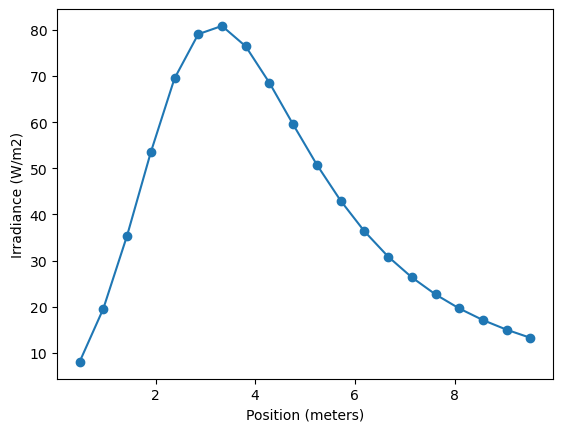

In [13]:
plt.clf()
plt.close('all')  
plt.figure()       
plt.plot(pos[:,0], np.array(pow_l)/(area), '-o')
plt.xlabel('Position (meters)')  
plt.ylabel('Irradiance (W/m2)')
plt.show()


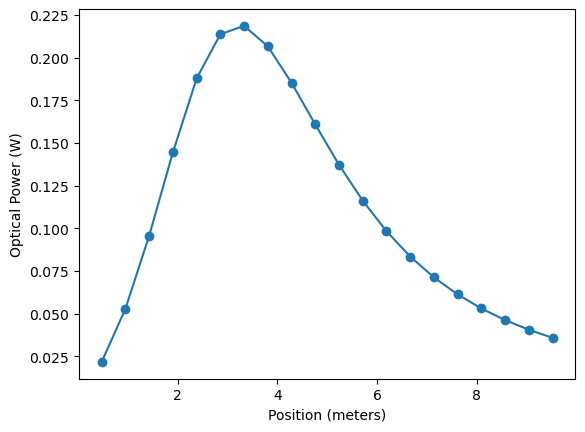

In [14]:
plt.clf()
plt.close('all')  
plt.figure()       
plt.plot(pos[:,0], np.array(pow_l), '-o')
plt.xlabel('Position (meters)')  
plt.ylabel('Optical Power (W)')
plt.show()

In [15]:
len(pos_l)

20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaling_factor = 1  #
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], color='b', marker='o', label='Points')
for i in range(N):
    ax.quiver(
        pos[i, 0], pos[i, 1], pos[i, 2],  
        nor_arr[i, 0], nor_arr[i, 1], nor_arr[i, 2],  
        length=scaling_factor, color='r', arrow_length_ratio=1e-10 
    )
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of Points with Direction Vectors')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 3])
ax.view_init(20, 30)
ax.legend()
plt.show()


No sun